# **Data Manipulation - Grouping**

- Manipulation data bertujuan untuk merubah data agar sesuai dengan format yang diinginkan.
- Data raw yang didapatkan biasanya perlu dirubah strukturnya agar mudah untuk dianalisis.
- proses yang dilakukan antara lain grouping, aggregasi, pivot atau mengaplikasikan fungsi-fungsi tertentu.

<img src="https://docs.tibco.com/pub/spotfire/6.5.2/doc/html/images/data_pivot_example1.png" alt="Drawing" width= 700;/> \\

**Outline**

- Grouping & Aggregation,
- Pivot,
- Apply Function,
- Parsing Dates

**Sumber:**
1. Stefanie Molin - Hands-On Data Analysis with Pandas_ A Python data science handbook for data collection, wrangling, analysis, and visualization-Packt Publishing (2021)
2. Tarek A. Atwan - Time Series Analysis with Python Cookbook_ Practical recipes for exploratory data analysis, data preparation, forecasting, and model evaluation-Packt Publishing (2022)
3. VanderPlas, Jacob T - Python data science handbook_ essential tools for working with data-O'Reilly Media (2017)
4. Wes McKinney - Python for Data Analysis_ Data Wrangling with pandas, NumPy, and Jupyter-O'Reilly Media (2022)

- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini untuk manipulasi data.

In [1]:
# load data
import pandas as pd
import numpy as np

## **Topik**
---



### **Subtopik 1 : Grouping & Aggregation**

**Melakukan grouping satu atau lebih variabel**

Pak Robin manager operasional PT. Indosales, memiliki data historis penjualan mainan


In [2]:
orders = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/orders_data.csv')
orders.head()

orderNumber   orderDate productCode                          productName  \
0        10100  2003-01-06    S18_1749             1917 Grand Touring Sedan   
1        10100  2003-01-06    S18_2248                   1911 Ford Town Car   
2        10100  2003-01-06    S18_4409  1932 Alfa Romeo 8C2300 Spider Sport   
3        10100  2003-01-06    S24_3969     1936 Mercedes Benz 500k Roadster   
4        10101  2003-01-09    S18_2325            1932 Model A Ford J-Coupe   

       category  quantityOrdered  priceEach  
0  Vintage Cars               30     136.00  
1  Vintage Cars               50      55.09  
2  Vintage Cars               22      75.46  
3  Vintage Cars               49      35.29  
4  Vintage Cars               25     108.06

Pak robin ingin mendapatkan summary dari data yang terdiri atas:
- total jumlah item yang terjual
- rata-rata jumlah item yang terjual
- max penjualan & min penjualan per item

Dapat dicari dengan
1. grouping data per itemnya
2. melakuakn agregasi dari hasil groupingnya.

Grouping dan aggregasi pada python dapat dilakukan menggunakan fungsi `groupby()`. Groupby digunakan untuk mengelompokkan data yang memiliki nilai yang sama dan dihitung menggunakan suatu operasi agregasi.



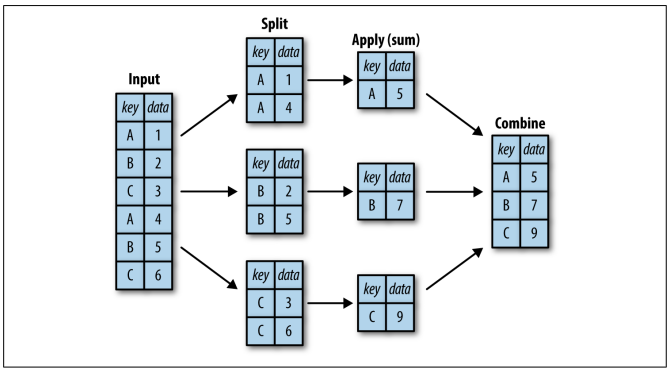

sumber : Python Data Science Handbook

Bagaimana cara kerja group by?
Group By ini tidak hanya mengumpulkan ke satu nilai yang sama, tetapi juga harus diikuti dengan agregasi/transformasi pada tiap grup. Tahapan yang dilakukan dalam groupby dan aggregasi:

1. **Split** : kita pisahkan value sesuai variabel yang ingin digroup by
2. **Apply** : melakukan agregasi/transformasi per nilai yang sudah dipisahkan tadi
3. **Combine** : hasil agregasi/transformasi

grouping data per item menggunakan groupby

#### **Group By Series**

In [3]:
# Membuat series penjualan permen
series_permen = pd.Series([12, 30, 22, 47],
                          index=['Lolipopi', 'Lolipopi', 'Asemnih', 'Asemnih'])

series_permen

Lolipopi    12
Lolipopi    30
Asemnih     22
Asemnih     47
dtype: int64

In [4]:
series_permen.groupby(level=0).sum()

Asemnih     69
Lolipopi    42
dtype: int64

In [5]:
# group by filter
series_permen.groupby(series_permen>25).sum()

False    34
True     77
dtype: int64

#### **Group By Dataframe**

In [6]:
# Membuat dataframe data penjualan permen
df_group = pd.DataFrame({'Permen': ['Lolipopi', 'Lolipopi',
                                    'Asemnih', 'Asemnih'],
                         'Terjual': [12, 30, 22, 47]})
df_group

Permen  Terjual
0  Lolipopi       12
1  Lolipopi       30
2   Asemnih       22
3   Asemnih       47

In [7]:
df_group.groupby('Permen').agg('sum')

Terjual
Permen           
Asemnih        69
Lolipopi       42

Dihitung berapa jumlah masing-masing permen yang terjual.

In [8]:
# Melakukan group by terhadap jenis permen dan agregasi sum
df_group.groupby('Permen').sum()

Terjual
Permen           
Asemnih        69
Lolipopi       42

**Melakukan agregasi dari hasil grouping**

Fungsi `agg()` digunakan untuk melakukan satu atau lebih agregasi.

In [9]:
# Cara 1
df_group.groupby('Permen').agg(['max', 'min', 'sum'])

Terjual        
             max min sum
Permen                  
Asemnih       47  22  69
Lolipopi      30  12  42

In [10]:
# Cara 2
np_max = np.max
np_min = np.min
np_sum = np.sum
np_mean = np.mean

df_group.groupby('Permen').agg([np_max, np_min, np_mean, np_sum])

Terjual              
             max min  mean sum
Permen                        
Asemnih       47  22  34.5  69
Lolipopi      30  12  21.0  42

Pada kasus Pak Robin, Untuk mendapat total, rata-rata, maximum dan minum dari tiap item, dapat dilakukan dengan cara:
1. Memanggil kolom yang dibutuhkan (`productName dan quantityOrdered`)
2. Melakukan grouping berdasarkan `productName`
3. Melakukan aggregasi untuk mendapatkan jumlah total, rata-rata, maximum dan minimum penjualan per item.

In [11]:
orders[['productName', 'quantityOrdered']].groupby('productName').agg(['sum', 'mean', 'max', 'min'])

quantityOrdered                   
                                                sum       mean max min
productName                                                           
18th Century Vintage Horse Carriage             260  28.888889  43  20
18th century schooner                           356  39.555556  50  30
1900s Vintage Bi-Plane                          300  33.333333  49  21
1900s Vintage Tri-Plane                         314  34.888889  48  26
1903 Ford Model A                               310  34.444444  49  22
...                                             ...        ...  ..  ..
The Mayflower                                   313  34.777778  50  29
The Queen Mary                                  264  29.333333  45  20
The Schooner Bluenose                           292  32.444444  43  21
The Titanic                                     320  35.555556  50  21
The USS Constitution Ship                       348  38.666667  50  31

[109 rows x 4 columns]

In [12]:
orders[['category', 'quantityOrdered']].groupby('category').agg(['sum', 'mean', 'max', 'min'])

quantityOrdered                   
                             sum       mean max min
category                                           
Classic Cars               11852  33.862857  50  20
Motorcycles                 4031  34.452991  50  20
Planes                      3833  35.490741  50  20
Ships                       2844  35.111111  50  20
Trains                       955  35.370370  50  20
Trucks and Buses            3647  36.838384  50  21
Vintage Cars                7406  33.972477  50  20

# **Data Manipulation - Pivot**

- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini untuk manipulasi data.

In [13]:
# load data
import pandas as pd
import numpy as np

## **Subtopik 2 : Pivot Table**


Jajaran direksi PT. Indosales ingin melihat ringkasan jumlah item bulanan yang terjual dari kategori produk yang dimiliki.

In [14]:
data_orders = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/orders_data_2.csv")
data_orders.head()

orderNumber   orderDate  month productCode  \
0        10100  2003-01-06      1    S18_1749   
1        10100  2003-01-06      1    S18_2248   
2        10100  2003-01-06      1    S18_4409   
3        10100  2003-01-06      1    S24_3969   
4        10101  2003-01-09      1    S18_2325   

                           productName      category  quantityOrdered  \
0             1917 Grand Touring Sedan  Vintage Cars               30   
1                   1911 Ford Town Car  Vintage Cars               50   
2  1932 Alfa Romeo 8C2300 Spider Sport  Vintage Cars               22   
3     1936 Mercedes Benz 500k Roadster  Vintage Cars               49   
4            1932 Model A Ford J-Coupe  Vintage Cars               25   

   priceEach  
0     136.00  
1      55.09  
2      75.46  
3      35.29  
4     108.06

Dapat diringkas dengan cara:
1. Mengubah tiap kategori menjadi kolom
2. Kolom bulan sebagai indeks
3. Membuat kolom quantity ordered sebagai value dari tiap baris dan kolom

Hal ini bisa dilakukan dengan membuat pivot dari data yang dimiliki.

### **Pivot**

pivot digunakan untuk menghitung, meringkas, dan menganalisis data yang memungkinkan kita melihat perbandingan, pola, dan tren dalam data Anda.

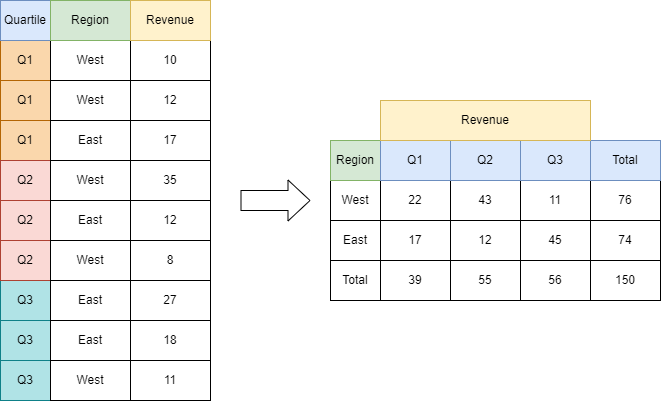

Bagaimana cara kerja pivot tabel?
Terdapat data sales berdasarkan quartile waktu dan region. Kita ingin melihat trend revenue masing-masing region tiap waktu.

1. Menentukan **index** : keys bagian baris yang digunakan untuk group by pada pivot table. Pada case ini, Region merupakan index.
2. Menentukan **column** : keys bagian kolom yang digunakan untuk group by pada pivot table. Pada case ini, quartile merupakan column.
3. Menentukan **values** : nilai agregasi yang diinginkan berdasarkan index dan column. Pada case ini, revenue adalah values.
4. Menentukan **aggfunc** : fungsi agregasi yang diinginkan. Pada case ini, digunakan fungsi sum (bisa dituliskan 'sum' atau np.sum)

In [15]:
# Membuat dataframe
df_piv = pd.DataFrame({"Quartile": ["Q1", "Q1", "Q1", "Q2", "Q2",
                         "Q2", "Q3", "Q3", "Q3"],
                   "Region": ["West", "West", "East", "West", "East",
                         "West", "East", "East", "West"],
                   "Revenue": [10, 12, 17, 35, 12, 8, 27, 18, 11]})
df_piv

Quartile Region  Revenue
0       Q1   West       10
1       Q1   West       12
2       Q1   East       17
3       Q2   West       35
4       Q2   East       12
5       Q2   West        8
6       Q3   East       27
7       Q3   East       18
8       Q3   West       11

In [16]:
# Membuat pivot tabel
df_piv.pivot_table(values='Revenue', index=['Region'], columns=['Quartile'], aggfunc='sum', fill_value=0, margins=True) #fill_value mengisi nilai NaN, margins untuk menjumlahkan total

Quartile  Q1  Q2  Q3  All
Region                   
East      17  12  45   74
West      22  43  11   76
All       39  55  56  150

Dalam kasus PT. Indosales, pivoting dapat dilakukan dengan cara:

In [17]:
data_orders.head()

orderNumber   orderDate  month productCode  \
0        10100  2003-01-06      1    S18_1749   
1        10100  2003-01-06      1    S18_2248   
2        10100  2003-01-06      1    S18_4409   
3        10100  2003-01-06      1    S24_3969   
4        10101  2003-01-09      1    S18_2325   

                           productName      category  quantityOrdered  \
0             1917 Grand Touring Sedan  Vintage Cars               30   
1                   1911 Ford Town Car  Vintage Cars               50   
2  1932 Alfa Romeo 8C2300 Spider Sport  Vintage Cars               22   
3     1936 Mercedes Benz 500k Roadster  Vintage Cars               49   
4            1932 Model A Ford J-Coupe  Vintage Cars               25   

   priceEach  
0     136.00  
1      55.09  
2      75.46  
3      35.29  
4     108.06

In [18]:
data_orders.pivot_table(values="quantityOrdered", index=["month"], columns=["category"],aggfunc='sum', fill_value=0)

category  Classic Cars  Motorcycles  Planes  Ships  Trains  Trucks and Buses  \
month                                                                          
1                  334            0       0      0      81               370   
2                  120          229     460    301      38                 0   
3                  929          170       0      0       0                93   
4                  465          212     401    323      69               279   
5                  934          251       0      0       0               248   
6                  338           23     416    319     116               160   
7                  961          408       0      0       0               257   
8                  339          440     371    318     106               136   
9                 1139           47       0    234      93               410   
10                2032          661     879    428     132               456   
11                3879         1163    1081    921     320              1238   
12                 382          427     225      0       0                 0   

category  Vintage Cars  
month                   
1                  572  
2                  301  
3                  563  
4                  244  
5                  584  
6                  313  
7                  519  
8                  264  
9                  587  
10                1143  
11                2260  
12                  56

# **Data Manipulation - Apply Function**

In [19]:
# Import library
import pandas as pd
import numpy as np

## **Subtopik 3: Apply Function**


PT Indosales memiliki data penjualan di London, New York, dan Helsinki.

In [20]:
# read data orders
orders_by_city = pd.read_csv("https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/order_by_city.csv")

# menampilkan data orders
orders_by_city

negara  order_bulan_1  order_bulan_2
0    London             20             11
1   Newyork             21             18
2    London             12             20
3   Newyork             33             15
4  Helsinki             29             32

- Pak Robin ingin mengetahui apakah total penjualan di tiap kota tersebut memenuhi target (penjualan >= 70).
- Pak robin ingin membuat kolom baru yang dapat mengidentifikasi hasil tersebut, dimana:
     - baris bernilai `Terpenuhi` jika mencapai / melewati target
     - baris bernilai `Tidak Terpenuhi` jika tidak mencapai target

Untuk melakukan hal ini dapat digunakan fungsi apply. Fungsi `apply()` pandas berguna untuk memasukkan fungsi ke dataframe pada axis tertentu (axis = 0 diaplikasikan ke tiap kolom, axis = 1 diaplikasikan ke tiap row). Fungsi apply dapat berjalan pada Pandas Series dan Pandas Dataframe.

**Ingat!** Ada dua bentuk function yang dibuat : menggunakan user defined function yang menggunakan def dan menggunakan lambda.

### **Mengaplikasikan fungsi ke kolom tertentu pada dataframe**

Bagaimana cara mengaplikasikan fungsi `apply()`?
1. Siapkan function (bisa pake def atau lambda, tapi biasanya kita butuh keduanya)
2. Pastikan tau kolom mana yang akan dilakukan perhitungan karena jika tidak ditentukan, fungsi apply akan masuk ke semua kolom atau jika ada variabel yang tidak cocok tipe datanya akan berakhir error (lihat contoh).
3. Gunakan fungsi apply

Pada kasus pak Robin yang akan dilakukan:
1. Menghitung total order tiap baris data.
2. Menghitung total order tiap kota.
3. Mengaplikasikan fungsi pengecekan jika penjualan memenuhi target atau tidak.

In [21]:
# 1. Menghitung total order bulanan
orders_by_city['total_order'] = orders_by_city['order_bulan_1'] + orders_by_city['order_bulan_2']
orders_by_city

negara  order_bulan_1  order_bulan_2  total_order
0    London             20             11           31
1   Newyork             21             18           39
2    London             12             20           32
3   Newyork             33             15           48
4  Helsinki             29             32           61

In [22]:
# 2. Menghitung total order tiap kota
total_orders_by_city = orders_by_city[["negara", "total_order"]].groupby("negara").sum()
total_orders_by_city

total_order
negara               
Helsinki           61
London             63
Newyork            87

In [23]:
# mengaplikasikan fungsi pengecekan
# Terpenuhi jika bernilai >= 70 memenuhi target
# Tidak Terpenuhi jika bernilai < 70 memenuhi target
total_orders_by_city["status"] = total_orders_by_city["total_order"].apply(lambda x: "Terpenuhi" if x >= 70 else "Tidak Terpenuhi" )
total_orders_by_city

total_order           status
negara                                
Helsinki           61  Tidak Terpenuhi
London             63  Tidak Terpenuhi
Newyork            87        Terpenuhi

Fungsi `.apply()` juga dapat diaplikasikan ke hasil grouping. Hal ini akan membuat output fungsi mirip seperti hasil window function pada SQL.

Contoh:
- Pak Robin ingin mengetahui persentase penjualan tiap record terhadap total penjualan masing-masing negara

In [24]:
# Membuat fungsi persen
def persen(x):
  return x/x.sum()

In [25]:
orders_by_city['persentase'] = persen(x = orders_by_city.total_order)

orders_by_city

negara  order_bulan_1  order_bulan_2  total_order  persentase
0    London             20             11           31    0.146919
1   Newyork             21             18           39    0.184834
2    London             12             20           32    0.151659
3   Newyork             33             15           48    0.227488
4  Helsinki             29             32           61    0.289100

In [26]:
# menghitung persentase order tiap record terhadap total order masing-masing negara
orders_by_city[['negara','total_order']].groupby('negara').apply(lambda x: persen(x))

<ipython-input-26-da9e6c717dbe>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  orders_by_city[['negara','total_order']].groupby('negara').apply(lambda x: persen(x))


total_order
0     0.492063
1     0.448276
2     0.507937
3     0.551724
4     1.000000

In [27]:
# menyimpan hasil perhitungan persentase ke dalam kolom baru
orders_by_city["percent_total_order"] = orders_by_city[['negara','total_order']].groupby('negara').apply(lambda x: persen(x))
orders_by_city

<ipython-input-27-2f3d88a4449a>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  orders_by_city["percent_total_order"] = orders_by_city[['negara','total_order']].groupby('negara').apply(lambda x: persen(x))


negara  order_bulan_1  order_bulan_2  total_order  persentase  \
0    London             20             11           31    0.146919   
1   Newyork             21             18           39    0.184834   
2    London             12             20           32    0.151659   
3   Newyork             33             15           48    0.227488   
4  Helsinki             29             32           61    0.289100   

   percent_total_order  
0             0.492063  
1             0.448276  
2             0.507937  
3             0.551724  
4             1.000000

# **Data Manipulation - Dates**

## **Subtopik 4 : Parsing Dates**

- Pak Setya meminta data analisnya untuk mengubah data string menjadi dalam bentuk date.
- Data date merupakan tipe data yang digunakan untuk merepresentasikan data tanggal dalam dataframe.
- Saat mengakses data tanggal dari sebuah file, data tersebut akan dikenali sebagai string.
- Karena itu biasanya akan dilakukan parsing terhadap data tanggal.

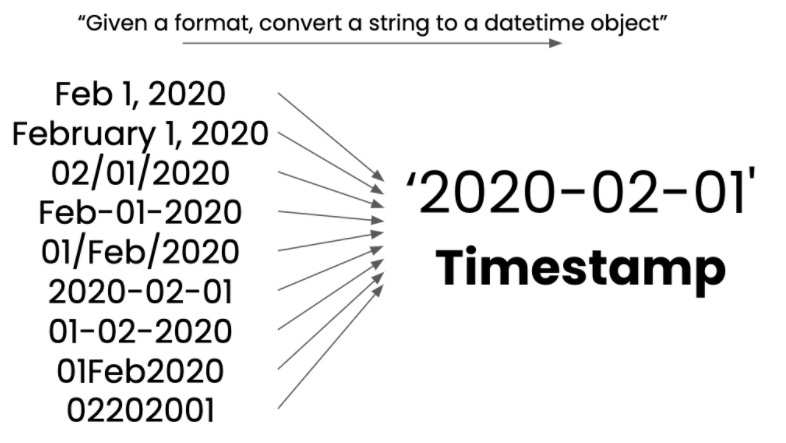

sumber: dataindependent.com

### **Convert data datetime dengan fungsi `to_datetime()` dari pandas**

Fungsi `to_datetime()` ini berguna untuk mengubah skalar, array/list, Series atau DataFrame/dictionary ke bentuk pandas datetime object.

Kenapa sih harus diubah ke pandas datetime object?
1. Mempermudah dalam mengambil informasi date seperti nama hari, bulan, tahun.
2. Banyak keuntungan yang dapat diambil dari fungsionalitas pandas date seperti resample

Mengubah data tanggal menjadi tipe data datetime

In [28]:
import pandas as pd

In [29]:
# mengubah series menjadi dalam bentuk datetime object
series_tanggal = pd.Series(['3/11/10', '3/12/10', '3/13/10'] * 1000)

series_tanggal

0       3/11/10
1       3/12/10
2       3/13/10
3       3/11/10
4       3/12/10
         ...   
2995    3/12/10
2996    3/13/10
2997    3/11/10
2998    3/12/10
2999    3/13/10
Length: 3000, dtype: object

In [30]:
# penggunaan dayfirst
pd.to_datetime(series_tanggal, dayfirst=True)

0      2010-11-03
1      2010-12-03
2      2010-03-13
3      2010-11-03
4      2010-12-03
          ...    
2995   2010-12-03
2996   2010-03-13
2997   2010-11-03
2998   2010-12-03
2999   2010-03-13
Length: 3000, dtype: datetime64[ns]

In [31]:
# Perbandingan saat mengatur dayfirst True dan tidak
pd.to_datetime(series_tanggal, infer_datetime_format=True) #default dayfirst adalah false

0      2010-03-11
1      2010-03-12
2      2010-03-13
3      2010-03-11
4      2010-03-12
          ...    
2995   2010-03-12
2996   2010-03-13
2997   2010-03-11
2998   2010-03-12
2999   2010-03-13
Length: 3000, dtype: datetime64[ns]

In [32]:
# Perbandingan saat mengatur dayfirst True dan tidak
pd.to_datetime(series_tanggal) #default dayfirst adalah false

0      2010-03-11
1      2010-03-12
2      2010-03-13
3      2010-03-11
4      2010-03-12
          ...    
2995   2010-03-12
2996   2010-03-13
2997   2010-03-11
2998   2010-03-12
2999   2010-03-13
Length: 3000, dtype: datetime64[ns]

Perhatikan penggunaan `dayfirst` pada fungsi to_datetime berguna untuk memberi informasi bahwa angka yang pertama adalah informasi hari. Namun, diperhatikan kembali. Jika terdapat informasi yang salah seperti tanggal 13 dijadikan bulan, fungsi akan otomatis berubah ke metode yang benar. Lihat tanggal 3/13/2000 dengan pengaturan dayfirst = True. Selain itu, bisa juga diatur angka pertama sebagai tahun menggunakan pengaturan parameter `yearfirst`.

Untuk lebih lengkapnya, kunjungi  https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

### **Parse date pada file csv**

Perusahaan Pembangkit Listrik memiliki data histori penggunaan energi tiap jamnya. Diinginkan untuk menambahkan datanya menjadi data hari, bulan, tahun, minggu ke-, hari ke- dan lain-lain untuk mempermudah dalam melihat trend konsumsi listrik sehingga nantinya dapat diprediksi kebutuhan energi ke depan.

Ambil dataset dari https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption file yg AEP_hourly.csv

In [33]:
# before parse_dates
df_file = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/AEP_hourly.csv')

df_file.head()

Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0

In [34]:
# melihat deskipsi data
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [35]:
# after parse_dates
df_file_1 = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/AEP_hourly.csv', parse_dates=['Datetime'])

df_file_1.head()

Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0

In [36]:
# melihat deskripsi data
df_file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


Bisa dilihat menggunakan parameter `parse_dates` dari fungsi `read_csv` kita bisa mengubah tipe data yang semula object menjadi datetime64.

In [37]:
# Mengubah kolom Datetime menjadi dalam datetime dan mengubahnya menjadi index
df_file_2 = pd.read_csv('https://raw.githubusercontent.com/ham407/Data-Manipulation-using-Python/main/Datasets/AEP_hourly.csv', parse_dates=['Datetime'], index_col=['Datetime'])
df_file_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [38]:
# 10 data teratas dari data AEP dengan datetime sebagai index
df_file_2.head(10)

AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
2004-12-31 06:00:00  13038.0
2004-12-31 07:00:00  13692.0
2004-12-31 08:00:00  14297.0
2004-12-31 09:00:00  14719.0
2004-12-31 10:00:00  14941.0

Untuk mempermudah analisis data, biasanya dilakukan visualisasi terhadap data. Di python visualisasi dapat dilakukan dengan bantuan library seaborn.

In [39]:
# import seaborn
import seaborn as sns

Visualisasi menggunakan seaborn dilakukan dengan memanggil fungsi-fungsi visualisasi yang sudah tersedia. Berikut contoh struktur untuk visualisasi menggunakan seaborn:

<img src="https://drive.google.com/uc?export=view&id=1rJSd8LGHQErGIjoO3UEbw8kPUDj_CImt" alt="Drawing" width= 300;/> \\



<Axes: xlabel='Datetime', ylabel='AEP_MW'>

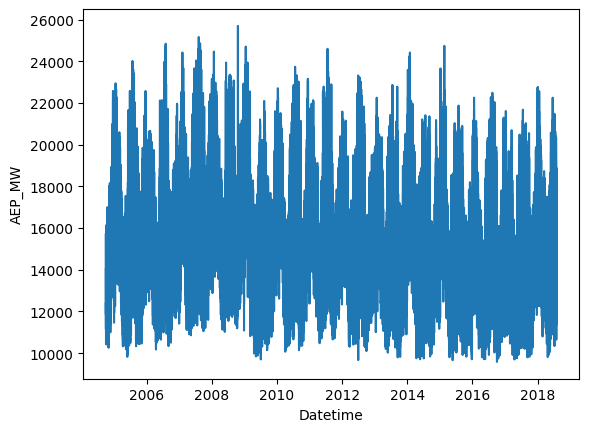

In [40]:
# lineplot data AEP_MW vs tanggal
sns.lineplot(data = df_file_1, x = "Datetime", y='AEP_MW')

### **Ekstrak data waktu dari data tanggal**


Dari data tanggal, dapat kita ekstrak menjadi informasi hari, bulan, tahun, dll. Kita coba gunakan data df_ekstrak untuk mengekstrak berbagai informasi waktu.

Kita juga bisa mengekstrak kolom dengan bantuan .dt accessor yang ada di pandas.

In [41]:
# cara extract analysis date
# 1. ubah tipe data ke datetimes / to_datetime --> done
# 2. buat kolom baru sesuai keinginan, e.g buat kolom day. month, weekday

df_file_1['day'] = df_file_1['Datetime'].dt.day
df_file_1['month'] = df_file_1['Datetime'].dt.month
df_file_1['weekday'] = df_file_1['Datetime'].dt.weekday

In [42]:
df_file_1.head()

Datetime   AEP_MW  day  month  weekday
0 2004-12-31 01:00:00  13478.0   31     12        4
1 2004-12-31 02:00:00  12865.0   31     12        4
2 2004-12-31 03:00:00  12577.0   31     12        4
3 2004-12-31 04:00:00  12517.0   31     12        4
4 2004-12-31 05:00:00  12670.0   31     12        4

In [43]:
# Mengekstraksi informasi tanggal dari kolom Datetime
df_file_1['date'] = df_file_1['Datetime'].dt.date
df_file_1['time'] = df_file_1['Datetime'].dt.time
df_file_1['day'] = df_file_1['Datetime'].dt.day
df_file_1['month'] = df_file_1['Datetime'].dt.month
df_file_1['year'] = df_file_1['Datetime'].dt.year
df_file_1['weekday'] = df_file_1['Datetime'].dt.weekday
df_file_1['day_name'] = df_file_1['Datetime'].dt.day_name()
df_file_1['dayofweek'] = df_file_1['Datetime'].dt.dayofweek
df_file_1

Datetime   AEP_MW  day  month  weekday        date  \
0      2004-12-31 01:00:00  13478.0   31     12        4  2004-12-31   
1      2004-12-31 02:00:00  12865.0   31     12        4  2004-12-31   
2      2004-12-31 03:00:00  12577.0   31     12        4  2004-12-31   
3      2004-12-31 04:00:00  12517.0   31     12        4  2004-12-31   
4      2004-12-31 05:00:00  12670.0   31     12        4  2004-12-31   
...                    ...      ...  ...    ...      ...         ...   
121268 2018-01-01 20:00:00  21089.0    1      1        0  2018-01-01   
121269 2018-01-01 21:00:00  20999.0    1      1        0  2018-01-01   
121270 2018-01-01 22:00:00  20820.0    1      1        0  2018-01-01   
121271 2018-01-01 23:00:00  20415.0    1      1        0  2018-01-01   
121272 2018-01-02 00:00:00  19993.0    2      1        1  2018-01-02   

            time  year day_name  dayofweek  
0       01:00:00  2004   Friday          4  
1       02:00:00  2004   Friday          4  
2       03:00:00  2004   Friday          4  
3       04:00:00  2004   Friday          4  
4       05:00:00  2004   Friday          4  
...          ...   ...      ...        ...  
121268  20:00:00  2018   Monday          0  
121269  21:00:00  2018   Monday          0  
121270  22:00:00  2018   Monday          0  
121271  23:00:00  2018   Monday          0  
121272  00:00:00  2018  Tuesday          1  

[121273 rows x 10 columns]

In [44]:
# membuat hasil grouping penggunaan listrik tiap harinya
aep_grouped_by_date = df_file_1[["date", "AEP_MW"]].groupby("date").mean()
aep_grouped_by_date.reset_index(inplace=True)
aep_grouped_by_date

date        AEP_MW
0     2004-10-01  14284.521739
1     2004-10-02  12999.875000
2     2004-10-03  12227.083333
3     2004-10-04  14309.041667
4     2004-10-05  14439.708333
...          ...           ...
5050  2018-07-30  15368.083333
5051  2018-07-31  15180.291667
5052  2018-08-01  15151.166667
5053  2018-08-02  15687.666667
5054  2018-08-03  14809.000000

[5055 rows x 2 columns]

<Axes: xlabel='date', ylabel='AEP_MW'>

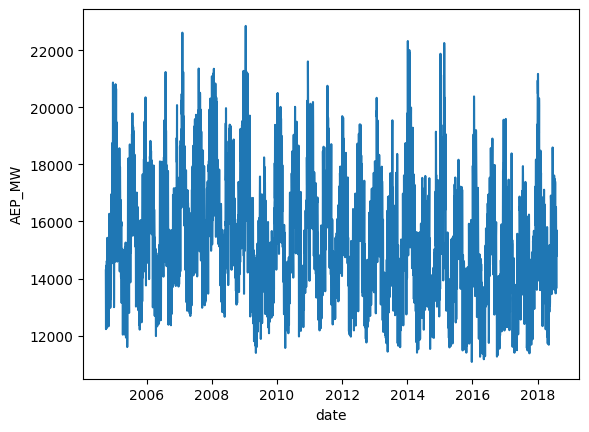

In [45]:
# plot rata-rata pengguaan listrik harian
sns.lineplot(data=aep_grouped_by_date, x="date", y="AEP_MW")

### **Resampling data tanggal**

Untuk menambah analisis, ingin dilihat konsumsi energi yang awalnya dalam bentuk **per jam menjadi** dalam bentuk **per hari**
serta dalam bentuk **per jam** menjadi dalam bentuk **per 10 menit**.





---



Metode Resampling digunakan untuk mengagregat data time series ke kondisi yang berbeda. Misalnya diubah data weekly menjadi daily, monthly, hourly, dll.

Ada dua jenis resampling:

1.   **Downsampling**. Mengubah waktu ke frame waktu yang lebih luas. Jika kamu memiliki data daily ingin diubah menjadi data weekly. Hasilnya akan mengurangi jumlah baris dan nilai perlu dilakukan agregasi seperti mean, sum, min, max, dll
1.   **Upsampling**. Mengubah frame waktu ke frame waktu yang lebih sempit. Jika kamu punya data daily ingin diubah menjadi data hourly. Hasilnya akan menambah jumlah baris sehingga upsampling akan menghasilkan null value yang perlu diisi/imputation.




Frequency offset aliases : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

|kode | deskripsi |
| ------------ | ------|
|MS | monthly start frequency|
|M | month end frequency|
|D | calendar day frequency|
|B | business day frequency|
|W | weekly frequency|
|H | hourly frequency|
|T | minutely frequency|
|S | secondly frequency|



Untuk melakukan resampling, digunakan fungsi resample dari pandas tetapi dengan syarat indexnya harus dalam bentuk datetime. Saat membaca csv dengan `read_csv` pandas, gunakan parameter `parse_date` untuk mengubah ke datetime dan `index_col` untuk mengubah kolom tertentu menjadi index.

### **Downsampling**

Akan kita ubah dari data per jam menjadi data harian. Pastikan date sudah menjadi index.

In [46]:
# Menampilkan data AEP
df_file_2

AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
...                      ...
2018-01-01 20:00:00  21089.0
2018-01-01 21:00:00  20999.0
2018-01-01 22:00:00  20820.0
2018-01-01 23:00:00  20415.0
2018-01-02 00:00:00  19993.0

[121273 rows x 1 columns]

In [47]:
# Melakukan downsampling dalam waktu harian dengan aggregation mean
df_resampled_1 = df_file_2.resample('D').mean()
df_resampled_1.head()

AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333

Dapat dilihat bahwa jumlah data yang awalnya 121273 baris menjadi 5055 baris.

In [48]:
# Mengecek satuan index
df_resampled_1.index[0]

Timestamp('2004-10-01 00:00:00', freq='D')

Ketika kita cek informasi indexnya, dapat dilihat bahwa data sudah berubah menjadi data daily.

#### **Upsampling**

Dalam upsampling, nantinya akan ada nilai NaN sehingga perlu diisi. Ada dua cara mengisi NaN ini:


*   metode forward fill `ffill()` menggunakan value terakhir sebelum NaN untuk imputasi
*   metode back fill `bfill()` menggunakan value pertama setelah NaN untuk imputasi



Akan kita ubah dari data per jam menjadi 10 menit. **harus ada aggregationnya baru bisa dikasih ffill atau bfill**

In [49]:
# Melakukan upsampling per 10 menit
df_file_2.resample('10T').mean()[:10]

AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 01:10:00      NaN
2004-10-01 01:20:00      NaN
2004-10-01 01:30:00      NaN
2004-10-01 01:40:00      NaN
2004-10-01 01:50:00      NaN
2004-10-01 02:00:00  11935.0
2004-10-01 02:10:00      NaN
2004-10-01 02:20:00      NaN
2004-10-01 02:30:00      NaN

In [50]:
# Mengisi NaN menggunakan metode ffill()
df_file_2.resample('10T').mean().ffill()

AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 01:10:00  12379.0
2004-10-01 01:20:00  12379.0
2004-10-01 01:30:00  12379.0
2004-10-01 01:40:00  12379.0
...                      ...
2018-08-02 23:20:00  15964.0
2018-08-02 23:30:00  15964.0
2018-08-02 23:40:00  15964.0
2018-08-02 23:50:00  15964.0
2018-08-03 00:00:00  14809.0

[727771 rows x 1 columns]

In [51]:
# Mengisi NaN dengan metode bfill()
df_file_2.resample('10T').mean().bfill()

AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 01:10:00  11935.0
2004-10-01 01:20:00  11935.0
2004-10-01 01:30:00  11935.0
2004-10-01 01:40:00  11935.0
...                      ...
2018-08-02 23:20:00  14809.0
2018-08-02 23:30:00  14809.0
2018-08-02 23:40:00  14809.0
2018-08-02 23:50:00  14809.0
2018-08-03 00:00:00  14809.0

[727771 rows x 1 columns]

# **Live Class**

**Outline**

1. Case 1 - Consumption Energy Time Series Data Manipulation
2. Case 2 - Supermarket Sales Data Manipulation

* Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini, yang meliputi kebutuhan:

  * membaca data
  * membuat data manipulasi
  * membuat visualisasi

In [52]:
# load data
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# warning
import warnings
warnings.filterwarnings("ignore")

## **Case Study 1: Time Series**
___


Perusahaan Listrik Negara ingin melakukan prediksi time series dari data konsumsi energi per jam. Pada bulan apa yang memiliki konsumsi energi tertinggi? Apakah di setiap tahunnya memiliki tren yang sama?

### 1.  Parse to datetime

In [53]:
# 1. Memparsing tanggal
df_energy = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/AEP_hourly.csv', parse_dates=['Datetime'])
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


In [54]:
# Mengambil cuplikan
df_energy.head()

Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0

### 2. Ekstrak date untuk feature engineering

In [55]:
# Mengekstrak informasi tanggal
df_energy['hour'] = df_energy.Datetime.dt.hour
df_energy['day'] = df_energy.Datetime.dt.day
df_energy['month'] = df_energy.Datetime.dt.month
df_energy['year'] = df_energy.Datetime.dt.year
df_energy['dayofweek'] = df_energy.Datetime.dt.dayofweek
df_energy['weekofyear'] = df_energy.Datetime.dt.weekofyear

df_energy.head()

Datetime   AEP_MW  hour  day  month  year  dayofweek  weekofyear
0 2004-12-31 01:00:00  13478.0     1   31     12  2004          4          53
1 2004-12-31 02:00:00  12865.0     2   31     12  2004          4          53
2 2004-12-31 03:00:00  12577.0     3   31     12  2004          4          53
3 2004-12-31 04:00:00  12517.0     4   31     12  2004          4          53
4 2004-12-31 05:00:00  12670.0     5   31     12  2004          4          53

In [56]:
# Mengecek min dan max Datetime pada data
print("Min: ", min(df_energy.Datetime))
print("Max: ", max(df_energy.Datetime))

Min:  2004-10-01 01:00:00
Max:  2018-08-03 00:00:00


In [57]:
# Mencari trend bulanan
bulanan = pd.DataFrame(df_energy.groupby(['month', 'year']) ['AEP_MW'].sum())

# tampilkan
bulanan

AEP_MW
month year            
1     2005  12735114.0
      2006  12208918.0
      2007  12892638.0
      2008  13819618.0
      2009  13877850.0
...                ...
12    2013  11913705.0
      2014  11669781.0
      2015  10507653.0
      2016  11704177.0
      2017  11974478.0

[167 rows x 1 columns]

In [58]:
df_energy.groupby(['month','year'])['AEP_MW'].sum()

month  year
1      2005    12735114.0
       2006    12208918.0
       2007    12892638.0
       2008    13819618.0
       2009    13877850.0
                  ...    
12     2013    11913705.0
       2014    11669781.0
       2015    10507653.0
       2016    11704177.0
       2017    11974478.0
Name: AEP_MW, Length: 167, dtype: float64

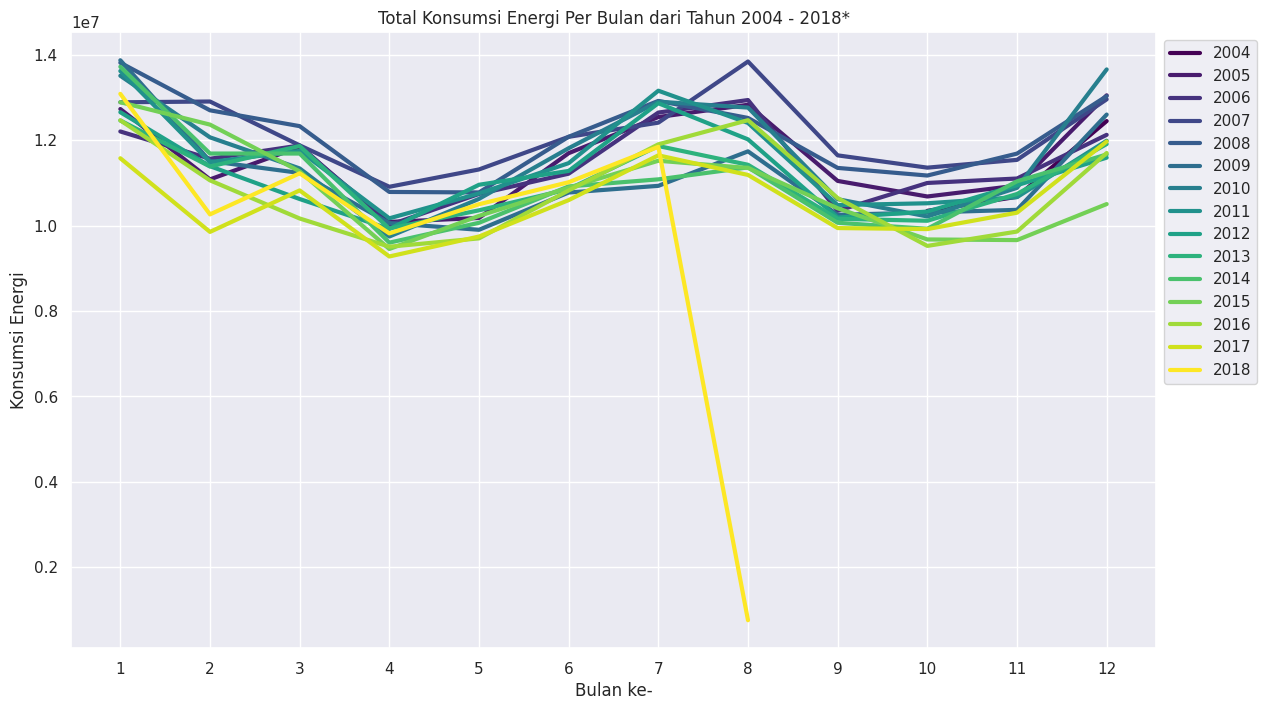

*** Pada bulan Agustus 2018 baru sampai tanggal 3 sehingga pada plot seperti terjadi penurunan ***


In [59]:
sns.set_style('darkgrid') # style
sns.set(rc={'figure.figsize' : (14,8)}) # mengatur ukuran gambar

# membuat lineplot
ax = sns.lineplot(data = bulanan, x = 'month', y = 'AEP_MW',
                  hue = 'year', palette = 'viridis',
                  legend = 'full', lw=3)

#mengatur sumbu x bertambah 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

# membuat legend
plt.title('Total Konsumsi Energi Per Bulan dari Tahun 2004 - 2018*')
plt.legend(bbox_to_anchor=(1,1))

plt.ylabel('Konsumsi Energi')
plt.xlabel('Bulan ke-')

# tampilkan
plt.show()
print("*** Pada bulan Agustus 2018 baru sampai tanggal 3 sehingga pada plot seperti terjadi penurunan ***")

Dari plot, dapat dilihat bahwa peningkatan konsumsi energi terjadi pada bulan Januari, Agustus, dan Desember. Oleh karena itu, perlu dipersiapkan sumber daya pembangkit yang lebih banyak di bulan ini.

### 3. Resampling

Diinginkan untuk melihat trend hari apa yang paling banyak mengkonsumsi energi apakah saat weekdays, weekend, atau hanya di hari-hari tertentu saja?

In [60]:
# Memparse tanggal dan menjadikannya jadi index
df_energy_res = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/AEP_hourly.csv', parse_dates=['Datetime'], index_col=['Datetime'])
df_energy_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [61]:
# melihat cuplikan head
df_energy_res.head()

AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0

In [62]:
# kita akan ubah menjadi per hari menggunakan downsampling
ef_energy_res = df_energy_res.resample('D').sum()

In [63]:
# mengubah kembali menjadi kolom
df_energy_res.reset_index(drop=False, inplace=True)

In [64]:
# melihat hasil perubahan kembali ke kolom
df_energy_res.head()

Datetime   AEP_MW
0 2004-12-31 01:00:00  13478.0
1 2004-12-31 02:00:00  12865.0
2 2004-12-31 03:00:00  12577.0
3 2004-12-31 04:00:00  12517.0
4 2004-12-31 05:00:00  12670.0

In [65]:
# Mengekstrak informasi tanggal
df_energy_res['day'] = df_energy_res.Datetime.dt.day
df_energy_res['month'] = df_energy_res.Datetime.dt.month
df_energy_res['year'] = df_energy_res.Datetime.dt.year
df_energy_res['dayofweek'] = df_energy_res.Datetime.dt.dayofweek
df_energy_res['weekofyear'] = df_energy_res.Datetime.dt.isocalendar().week
df_energy_res.head()

Datetime   AEP_MW  day  month  year  dayofweek  weekofyear
0 2004-12-31 01:00:00  13478.0   31     12  2004          4          53
1 2004-12-31 02:00:00  12865.0   31     12  2004          4          53
2 2004-12-31 03:00:00  12577.0   31     12  2004          4          53
3 2004-12-31 04:00:00  12517.0   31     12  2004          4          53
4 2004-12-31 05:00:00  12670.0   31     12  2004          4          53

In [66]:
#Mencari trend harian
harian = pd.DataFrame(df_energy_res.groupby(['dayofweek','year'])['AEP_MW'].mean())
harian

AEP_MW
dayofweek year              
0         2004  16028.759615
          2005  16108.193910
          2006  16138.809295
          2007  16938.155660
          2008  16909.495192
...                      ...
6         2014  13783.206731
          2015  13692.038462
          2016  13556.373397
          2017  13392.882075
          2018  14151.070932

[105 rows x 1 columns]

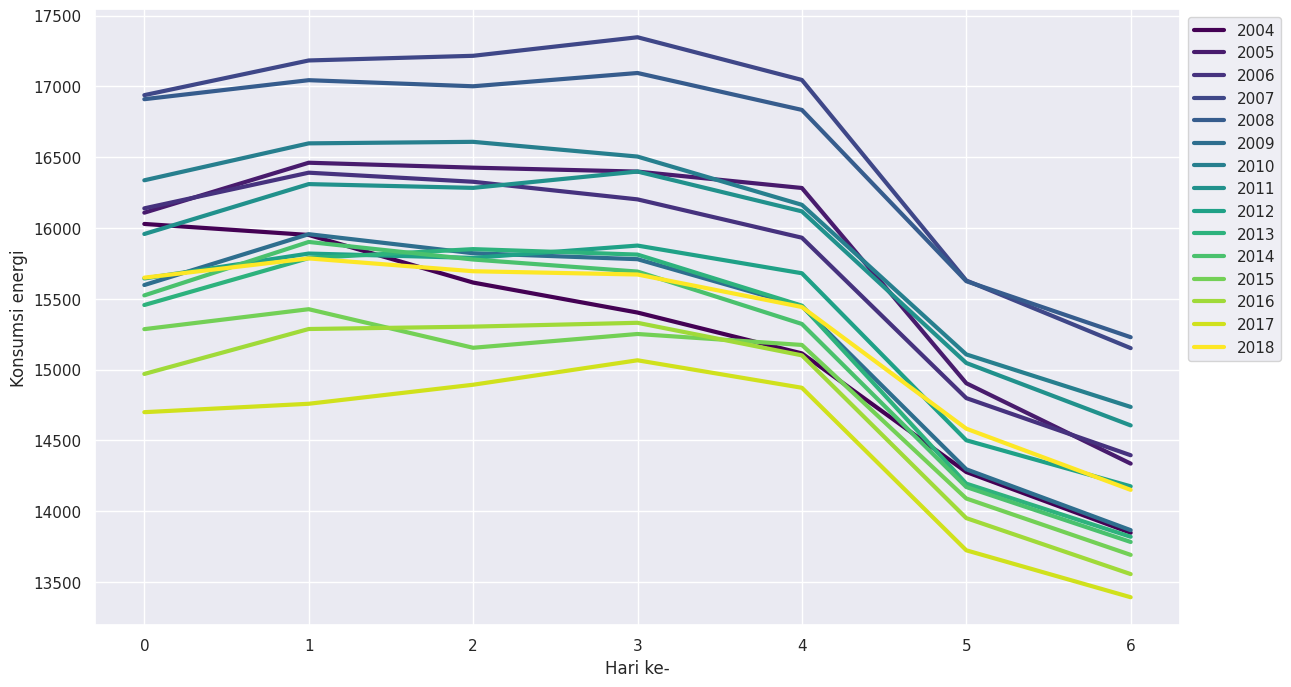

In [67]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=harian, x ='dayofweek', y = 'AEP_MW',
                  hue='year', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Konsumsi energi')
plt.xlabel('Hari ke-')
plt.show()

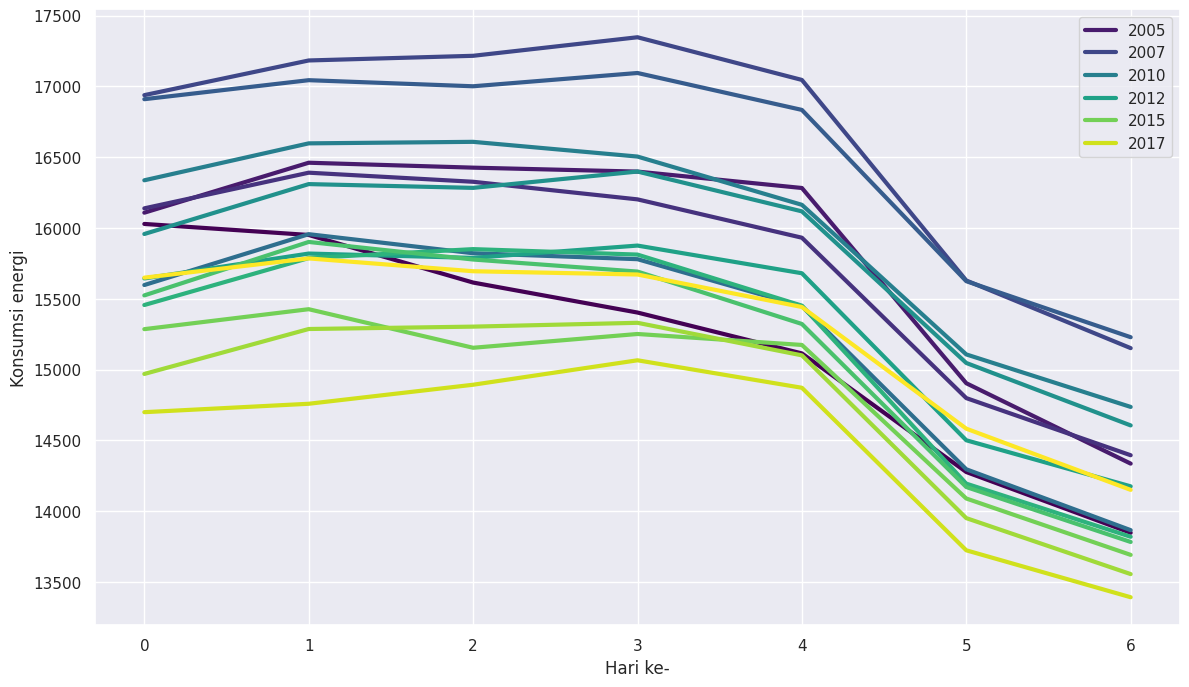

In [68]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=harian, x ='dayofweek', y = 'AEP_MW',
                  hue='year', palette='viridis',
                  legend='auto', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Konsumsi energi')
plt.xlabel('Hari ke-')
plt.show()

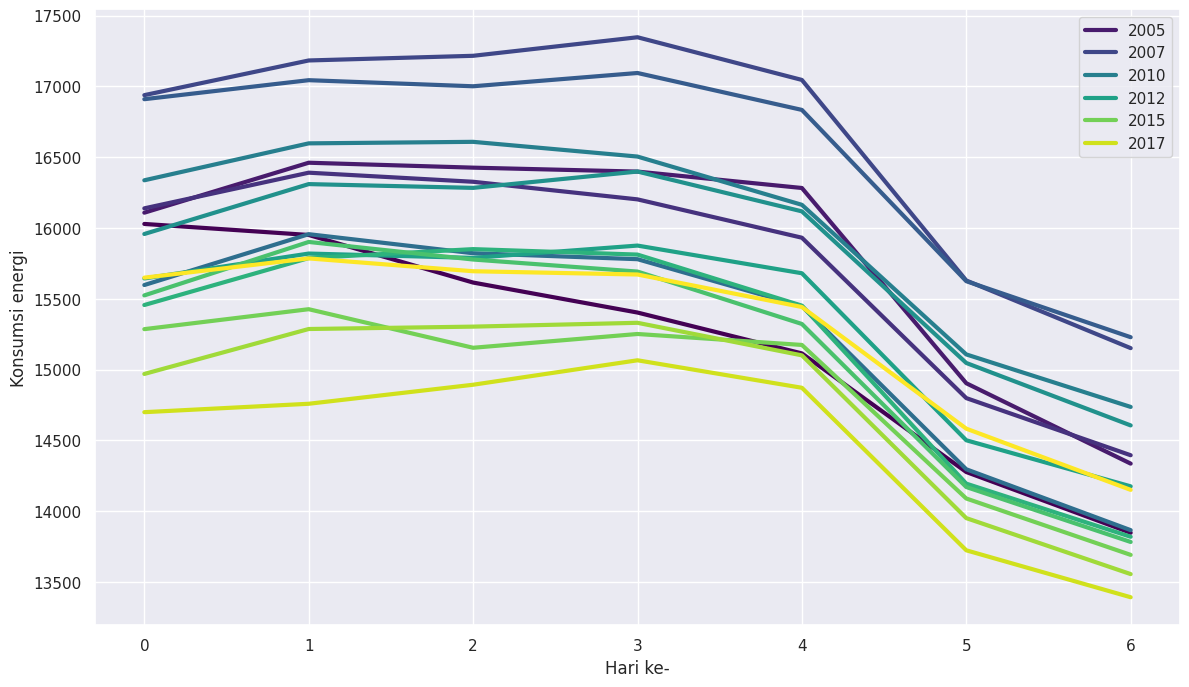

In [69]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=harian, x ='dayofweek', y = 'AEP_MW',
                  hue='year', palette='viridis',
                  legend='brief', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Konsumsi energi')
plt.xlabel('Hari ke-')
plt.show()

Pada plot di atas, konsumsi energi terendah terjadi pada hari Sabtu (hari ke-5) dan Minggu (hari ke-6). Hal ini terjadi kemungkinan karena Perusahaan berhenti beroperasi. Hal ini menunjukkan pada hari Sabtu dan Minggu tidak perlu menyiapkan sumber daya pembangkit yang banyak seperti hari-hari biasanya.

### **Exercise**

### Kunci jawaban 1 : Pada jam berapa biasanya terjadi peningkatan konsumsi energi? Apakah pada tiap tahun memiliki trend yang sama?

In [70]:
# Kita gunakan data featur engineering df_energy tanpa resampling
jam = pd.DataFrame(df_energy.groupby(['hour', 'year']) ['AEP_MW'].mean())

# tampilkan
jam.head()

AEP_MW
hour year              
0    2004  14391.989011
     2005  15047.463014
     2006  14906.550685
     2007  15755.071233
     2008  15691.311475

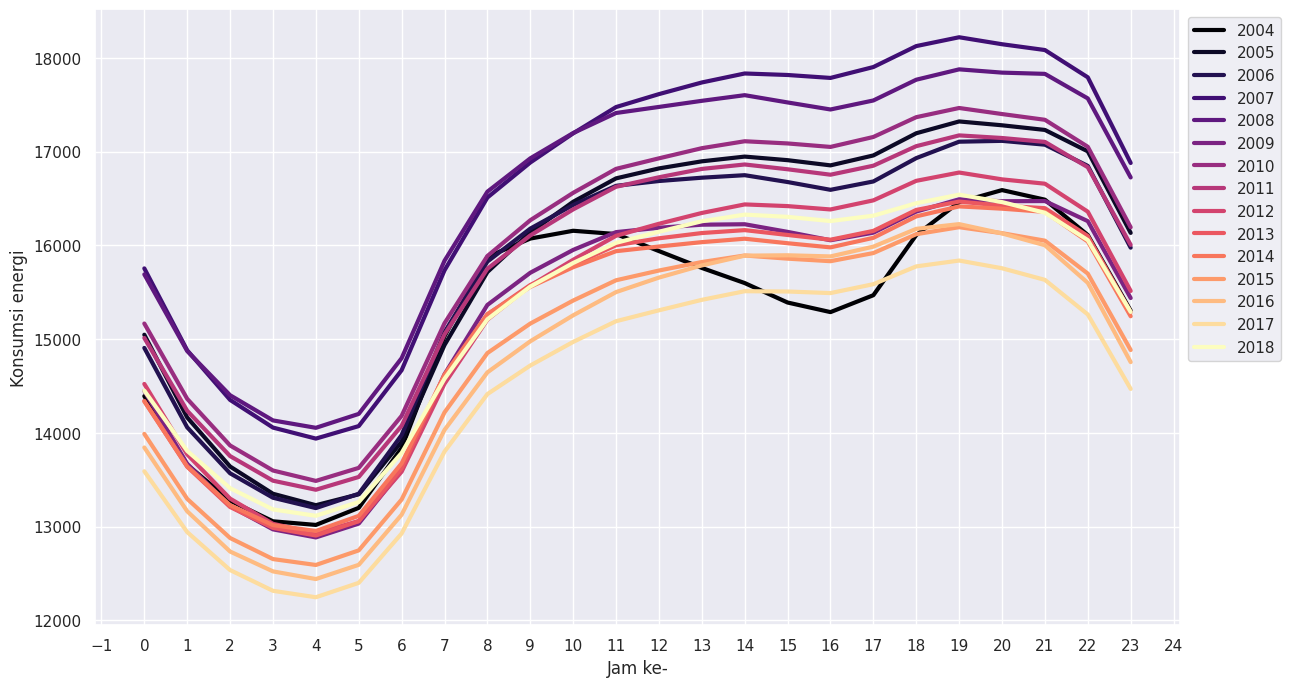

In [71]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=jam, x ='hour', y = 'AEP_MW',
                  hue='year', palette='magma',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Konsumsi energi')
plt.xlabel('Jam ke-')
plt.show()

In [72]:
#xs digunakan untuk mempermudah akses multiIndex
#https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d

jam.xs(2004, level='year')

AEP_MW
hour              
0     14391.989011
1     13659.554348
2     13276.538462
3     13056.195652
4     13017.521739
5     13199.826087
6     13838.760870
7     15030.869565
8     15877.576087
9     16073.293478
10    16156.445652
11    16121.445652
12    15939.739130
13    15759.891304
14    15598.456522
15    15390.717391
16    15288.467391
17    15468.891304
18    16110.760870
19    16461.576087
20    16590.532609
21    16488.239130
22    16110.891304
23    15304.021739

Dari plot, dapat dilihat bahwa tren tiap tahunnya masih hampir sama yakni puncak pertama pada pukul 14 kemudian turun dan naik lagi pukul 16 dan pada pukul 19 merupakan puncaknya kemudian mulai turun dan mulai naik lagi keesokan harinya mulai pukul 5 pagi.



---



### Kunci Jawaban 2 : Apakah ada perbedaan peningkatan konsumsi energi per jam saat weekdays dan weekend?

In [73]:
# Feature engineering weekend dan weekday
df_energy['day_status'] = df_energy.dayofweek.map(lambda x: "weekend" if (x==5) | (x==6) else "weekdays")
df_energy[['dayofweek','day_status']].sample(10)

dayofweek day_status
62655           6    weekend
10257           6    weekend
115878          2   weekdays
60453           0   weekdays
98969           4   weekdays
29293           4   weekdays
65209           1   weekdays
54215           6    weekend
32995           3   weekdays
27032           4   weekdays

In [74]:
# Membuat dataframe dari hasil groupby
jam_week = pd.DataFrame(df_energy.groupby(['day_status', 'hour'])['AEP_MW'].mean())
jam_week

AEP_MW
day_status hour              
weekdays   0     14821.925741
           1     14058.361773
           2     13604.705263
           3     13363.001108
           4     13291.754780
           5     13492.847368
           6     14201.130471
           7     15442.113850
           8     16226.425208
           9     16464.445706
           10    16650.857895
           11    16869.560665
           12    16951.889751
           13    17032.936842
           14    17108.610695
           15    17060.147645
           16    16978.884765
           17    17047.180055
           18    17229.343213
           19    17317.127147
           20    17251.253740
           21    17181.375900
           22    16869.397784
           23    15964.509972
weekend    0     14224.474377
           1     13474.270083
           2     12998.656467
           3     12732.288811
           4     12603.925900
           5     12609.756925
           6     12805.578947
           7     13130.554709
           8     13609.842798
           9     14218.173823
           10    14667.849030
           11    14898.202909
           12    15013.895429
           13    15089.933518
           14    15100.181440
           15    15074.468144
           16    15108.559557
           17    15279.185596
           18    15596.932133
           19    15747.731302
           20    15746.538781
           21    15719.882271
           22    15467.891967
           23    14802.804709

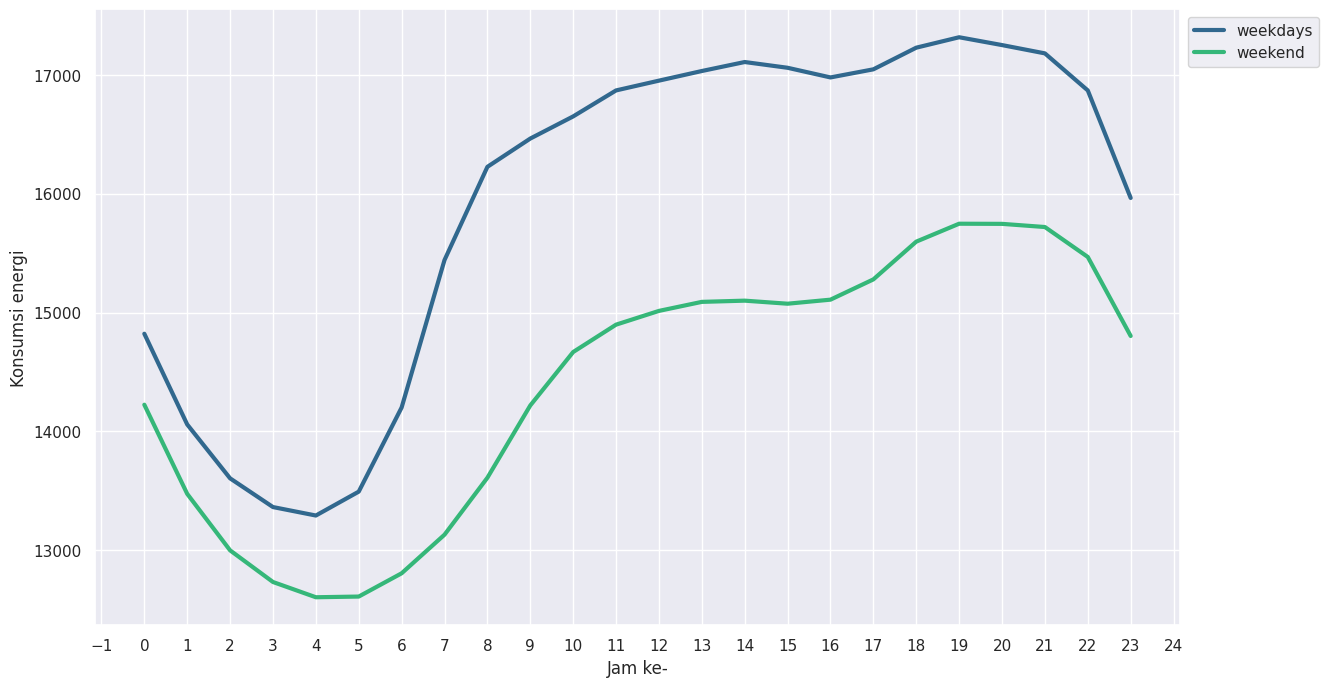

In [75]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=jam_week, x ='hour', y = 'AEP_MW',
                  hue='day_status', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Konsumsi energi')
plt.xlabel('Jam ke-')
plt.show()

## **Case Study 2: Marketing**
___


Supermarket memiliki data histori penjualan di berbagai kota ingin dilakukan analisis:


TIME SERIES
1. Kapan saja akan terjadi lonjakan pembelian dan pada produk apa berdasarkan kota dan tahunnya?

PEMBAYARAN
2. Menggunakan jenis pembayaran apa customer membayar dan jenis pembayaran mana yang digunakan untuk pembelian dalam jumlah nominal yang besar?

SUPERMARKET
3. Supermarket di kota mana yang mendapatkan pendapatan dan gross income tertinggi?

PRODUK
4. Berapa jumlah produk yang terjual di kota tertentu dan dari tipe nasabah yang seperti apa?
5. Produk apa yang memiliki rata-rata rating paling tinggi? Apakah rating tinggi juga ditunjukkan dengan jumlah quantity pembelian yang banyak?

SALES
6. Berapa minimal, mean, dan max total quantity dan sales yang diperoleh dari masing-masing produk dan branch?
7. Bandingkan total penjualan tiap bulannya dengan rata-rata total penjualan  di setiap kota





In [76]:
# Membaca csv
sales = pd.read_csv('https://raw.githubusercontent.com/ham407/File-Latihan-Data-Python/main/week-6/supermarket_sales_raw.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  cogs           1000 non-null   float64
 14  Rating         1000 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 117.3+ KB


In [77]:
# melihat cuplikasn
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  Rating  
0  13:08      Ewallet  522.83     9.1  
1  10:29         Cash   76.40     9.6  
2  13:23  Credit card  324.31     7.4  
3  20:33      Ewallet  465.76     8.4  
4  10:37      Ewallet  604.17     5.3

### Feature Engineering

#### **Kita perlu menambahkan kolom baru Gross Margin Percentage dan Gross Income**

Gross margin percentage adalah selisih antara Total pendapatan dengan cost of Goods Sold (cogs) dibagi dengan total pendapatan dengan satuan persen. Kapan industri dikatakan memiliki good gross margin? Berbeda industri tergantung ukuran dan kategori akan memiliki rule of thumb sendiri-sendiri untuk menyebutnya sebagai good. Rata-rata industri akan diusahakan mendapatkan 10% gross margin.

Untuk lebih lengkapnya kunjungi https://corporatefinanceinstitute.com/resources/accounting/profit-margin/

Gross income adalah pendapatan kotor yang diterima oleh perusahaan. Nilai ini merupakan biaya perolehan dikurangi penjualan bersih sebelum pajak dari penjualan.

In [78]:
# Membuat kolom baru dengan memasukkan formula dengan fungsi apply
sales['gross_margin_percentage'] = sales.apply(lambda x:(x['Total']-x['cogs'])*100/x['Total'], axis=1)
sales['gross_income'] = sales.apply(lambda x:x['Total']-x['cogs'], axis=1)
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  Rating  gross_margin_percentage  gross_income  
0  13:08      Ewallet  522.83     9.1                 4.761905       26.1415  
1  10:29         Cash   76.40     9.6                 4.761905        3.8200  
2  13:23  Credit card  324.31     7.4                 4.761905       16.2155  
3  20:33      Ewallet  465.76     8.4                 4.761905       23.2880  
4  10:37      Ewallet  604.17     5.3                 4.761905       30.2085

#### **Kita juga perlu menambah informasi tanggal**

In [79]:
# Membuat kolom baru dengan mengekstrak tanggal
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Day'] = sales['Date'].dt.day
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year
sales['Hour'] = pd.to_datetime(sales['Time']).dt.hour
sales.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1415  548.9715  ...   
1  Electronic accessories       15.28         5   3.8200   80.2200  ...   
2      Home and lifestyle       46.33         7  16.2155  340.5255  ...   
3       Health and beauty       58.22         8  23.2880  489.0480  ...   
4       Sports and travel       86.31         7  30.2085  634.3785  ...   

    Time      Payment    cogs  Rating  gross_margin_percentage  gross_income  \
0  13:08      Ewallet  522.83     9.1                 4.761905       26.1415   
1  10:29         Cash   76.40     9.6                 4.761905        3.8200   
2  13:23  Credit card  324.31     7.4                 4.761905       16.2155   
3  20:33      Ewallet  465.76     8.4                 4.761905       23.2880   
4  10:37      Ewallet  604.17     5.3                 4.761905       30.2085   

   Day  Month  Year  Hour  
0    5      1  2019    13  
1    8      3  2019    10  
2    3      3  2019    13  
3   27      1  2019    20  
4    8      2  2019    10  

[5 rows x 21 columns]

### Analisis 1 : Pada bulan kapan saja akan terjadi lonjakan total sales dan pada produk apa berdasarkan kota?

In [80]:
# Membuat dataframe dari hasil group by
analisa_1 = pd.DataFrame(sales.groupby(['City', 'Product line','Month', 'Year'])['Total'].sum().round(0))

# # Memformat nilai total tanpa angka di belakang koma
# analisa_1['Total'] = analisa_1['Total'].round(0)

analisa_1

Total
City      Product line           Month Year         
Mandalay  Electronic accessories 1     2019   6700.0
                                 2     2019   6686.0
                                 3     2019   3665.0
          Fashion accessories    1     2019   6113.0
                                 2     2019   6137.0
                                 3     2019   4164.0
          Food and beverages     1     2019   6609.0
                                 2     2019   5555.0
                                 3     2019   3051.0
          Health and beauty      1     2019   6400.0
                                 2     2019   5856.0
                                 3     2019   7724.0
          Home and lifestyle     1     2019   4586.0
                                 2     2019   4660.0
                                 3     2019   8303.0
          Sports and travel      1     2019   6768.0
                                 2     2019   5530.0
                                 3     2019   7690.0
Naypyitaw Electronic accessories 1     2019   5730.0
                                 2     2019   5474.0
                                 3     2019   7765.0
          Fashion accessories    1     2019   6385.0
                                 2     2019   7699.0
                                 3     2019   7476.0
          Food and beverages     1     2019   8315.0
                                 2     2019   7391.0
                                 3     2019   8061.0
          Health and beauty      1     2019   6021.0
                                 2     2019   5830.0
                                 3     2019   4764.0
          Home and lifestyle     1     2019   5595.0
                                 2     2019   3003.0
                                 3     2019   5298.0
          Sports and travel      1     2019   8389.0
                                 2     2019   3537.0
                                 3     2019   3836.0
Yangon    Electronic accessories 1     2019   6401.0
                                 2     2019   5203.0
                                 3     2019   6713.0
          Fashion accessories    1     2019   6847.0
                                 2     2019   5174.0
                                 3     2019   4311.0
          Food and beverages     1     2019   4646.0
                                 2     2019   7054.0
                                 3     2019   5463.0
          Health and beauty      1     2019   3963.0
                                 2     2019   2915.0
                                 3     2019   5720.0
          Home and lifestyle     1     2019  10314.0
                                 2     2019   4772.0
                                 3     2019   7332.0
          Sports and travel      1     2019   6510.0
                                 2     2019   4742.0
                                 3     2019   8120.0

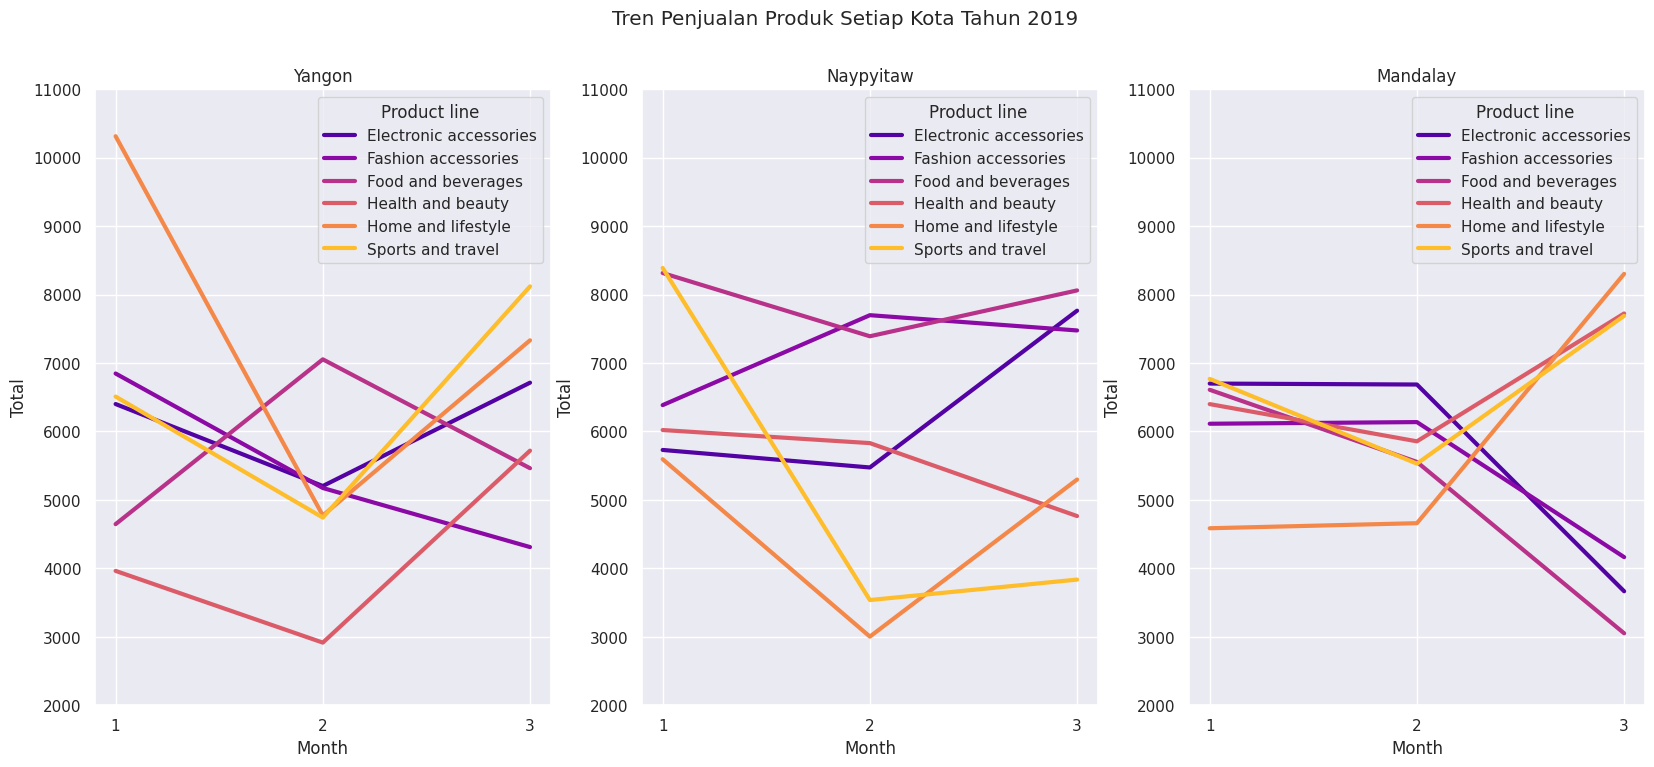

In [81]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})

fig, axes = plt.subplots(1, 3, sharey=False)
fig.suptitle('Tren Penjualan Produk Setiap Kota Tahun 2019')

city = [k for k in sales.City.unique()]
for i, kota in enumerate(city):
  sns.lineplot(data=analisa_1.xs(kota), x ='Month', y = 'Total',
                    hue='Product line', palette='plasma',
                    legend='full', lw=3, ax=axes[i])
  axes[i].set_title(str(kota))
  axes[i].set_ylim(2000,11000)
  axes[i].xaxis.set_major_locator(ticker.MultipleLocator(1))

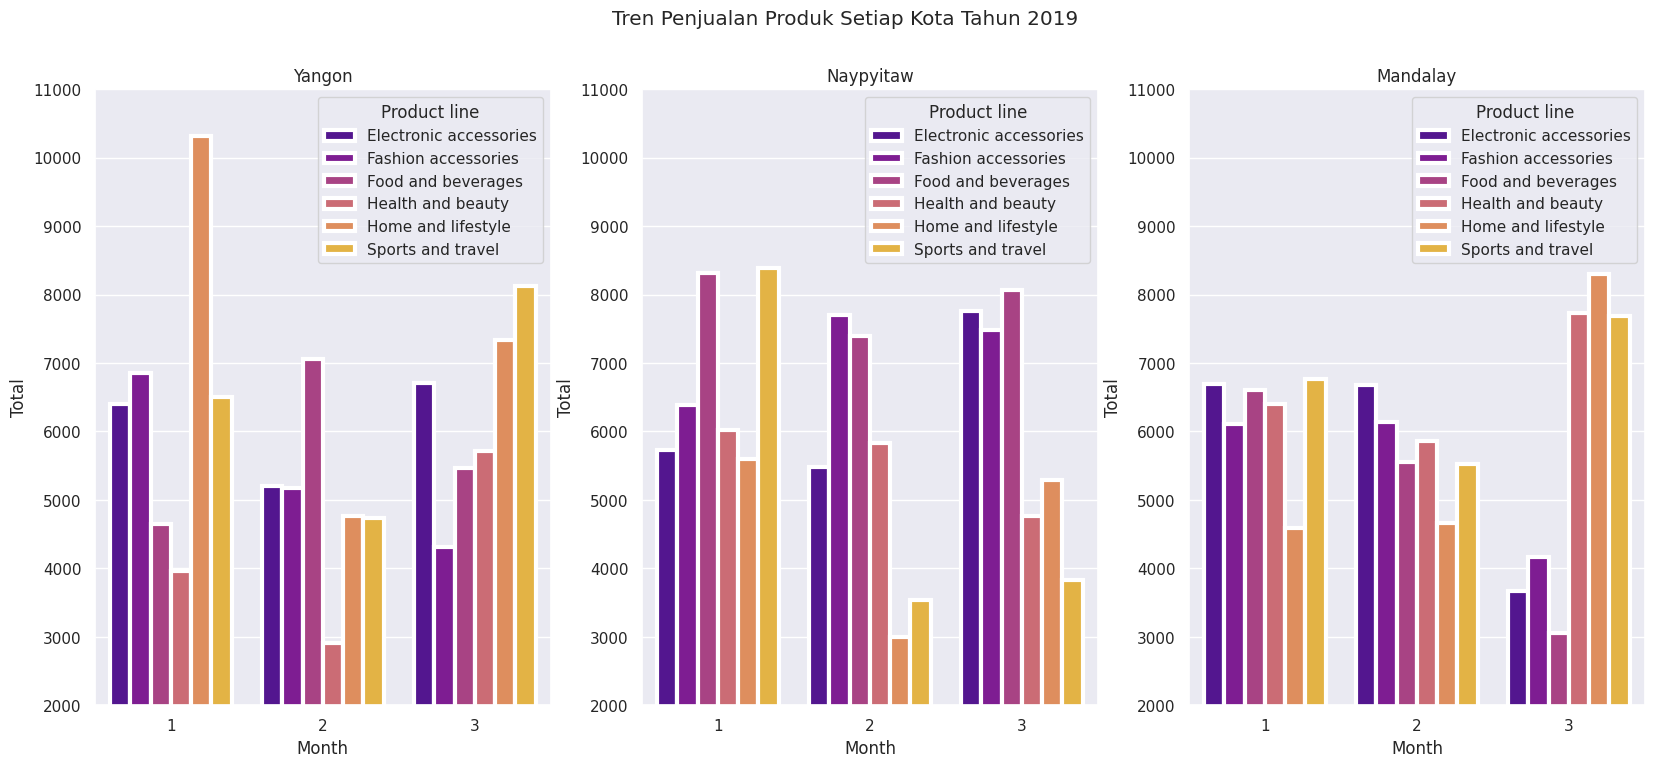

In [82]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})

fig, axes = plt.subplots(1, 3, sharey=False)
fig.suptitle('Tren Penjualan Produk Setiap Kota Tahun 2019')

city = [k for k in sales.City.unique()]
for i, kota in enumerate(city):
  sns.barplot(data=analisa_1.xs(kota), x ='Month', y = 'Total',
                    hue='Product line', palette='plasma',
                    legend='full', lw=3, ax=axes[i])
  axes[i].set_title(str(kota))
  axes[i].set_ylim(2000,11000)
  axes[i].xaxis.set_major_locator(ticker.MultipleLocator(1))

### **Analisis 2 : Menggunakan jenis pembayaran apa paling banyak customer membayar dan jenis pembayaran mana yang digunakan untuk pembelian dalam jumlah nominal yang besar?**

In [83]:
# Melakukan pivot tabel
sales.pivot_table(values = ['Total'], index='Payment', aggfunc=[np.sum, len])

sum   len
                  Total Total
Payment                      
Cash         112206.570   344
Credit card  100767.072   311
Ewallet      109993.107   345

### **Analisis 3 : Supermarket di kota mana yang mendapatkan pendapatan dan gross income tertinggi?**

In [84]:
# Melakukan pivot tabel
sales.pivot_table(index='City', values=['Total', 'gross_income'], aggfunc=np.sum)

Total  gross_income
City                                
Mandalay   106197.6720     5057.0320
Naypyitaw  110568.7065     5265.1765
Yangon     106200.3705     5057.1605

### **Analisis 4 : Berapa jumlah produk yang terjual di kota tertentu dan dari tipe nasabah yang seperti apa?**

In [85]:
sales.pivot_table(index=['City'], columns=['Product line'], values=['Quantity'], aggfunc= np.sum, margins=True)

Quantity                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
City                                                                         
Mandalay                        316                 297                270   
Naypyitaw                       333                 342                369   
Yangon                          322                 263                313   
All                             971                 902                952   

                                                                           
Product line Health and beauty Home and lifestyle Sports and travel   All  
City                                                                       
Mandalay                   320                295               322  1820  
Naypyitaw                  277                245               265  1831  
Yangon                     257                371               333  1859  
All                        854                911               920  5510

### Analisis 5 : Produk apa yang memiliki rata-rata rating paling tinggi? Apakah rating tinggi juga ditunjukkan dengan jumlah quantity pembelian yang banyak? (Karena kemungkinan tiap kota seleranya berbeda, silakan dibedakan berdasarkan kota)

In [86]:
# mengatur palette
cm = sns.light_palette("green", as_cmap=True)

In [87]:
sales.pivot_table(values=['Rating', 'Quantity'], index=['City', 'Product line'], aggfunc={'Rating':np.mean, 'Quantity':np.sum}).sort_values(by='Rating', ascending=False).style.background_gradient(cmap=cm).set_precision(2)

### **Analisa 6 : Berapa minimal, mean, dan max gross income dan sales yang diperoleh dari masing-masing produk dan kota?**

In [88]:
sales.groupby(['Product line','City'])[['Total', 'gross_income']].agg(['min', 'mean', 'max', 'sum'])

Total                                     \
                                      min        mean        max         sum   
Product line           City                                                    
Electronic accessories Mandalay   26.7225  310.026245   942.4485  17051.4435   
                       Naypyitaw  31.7520  344.890445   864.5700  18968.9745   
                       Yangon     30.4080  305.285225   931.0350  18317.1135   
Fashion accessories    Mandalay   35.1960  264.730911   874.1250  16413.3165   
                       Naypyitaw  13.1670  331.693385  1042.6500  21560.0700   
                       Yangon     12.6945  320.245265  1039.2900  16332.5085   
Food and beverages     Mandalay   56.4060  304.297770   888.6150  15214.8885   
                       Naypyitaw  22.6590  360.103864  1034.4600  23766.8550   
                       Yangon     33.4320  295.915526   932.3370  17163.1005   
Health and beauty      Mandalay   18.6375  376.993585   922.6350  19980.6600   
                       Naypyitaw  32.2770  319.525500   950.2500  16615.3260   
                       Yangon     19.2465  268.037298   752.6400  12597.7530   
Home and lifestyle     Mandalay   33.9360  350.983290  1022.4900  17549.1645   
                       Naypyitaw  14.6790  308.790067  1023.7500  13895.5530   
                       Yangon     19.1940  344.879931   951.8250  22417.1955   
Sports and travel      Mandalay   34.6290  322.390306   944.6220  19988.1990   
                       Naypyitaw  10.6785  350.265067  1002.1200  15761.9280   
                       Yangon     16.1070  328.350839   926.9505  19372.6995   

                                 gross_income                                 
                                          min       mean      max        sum  
Product line           City                                                   
Electronic accessories Mandalay        1.2725  14.763155  44.8785   811.9735  
                       Naypyitaw       1.5120  16.423355  41.1700   903.2845  
                       Yangon          1.4480  14.537392  44.3350   872.2435  
Fashion accessories    Mandalay        1.6760  12.606234  41.6250   781.5865  
                       Naypyitaw       0.6270  15.794923  49.6500  1026.6700  
                       Yangon          0.6045  15.249775  49.4900   777.7385  
Food and beverages     Mandalay        2.6860  14.490370  42.3150   724.5185  
                       Naypyitaw       1.0790  17.147803  49.2600  1131.7550  
                       Yangon          1.5920  14.091216  44.3970   817.2905  
Health and beauty      Mandalay        0.8875  17.952075  43.9350   951.4600  
                       Naypyitaw       1.5370  15.215500  45.2500   791.2060  
                       Yangon          0.9165  12.763681  35.8400   599.8930  
Home and lifestyle     Mandalay        1.6160  16.713490  48.6900   835.6745  
                       Naypyitaw       0.6990  14.704289  48.7500   661.6930  
                       Yangon          0.9140  16.422854  45.3250  1067.4855  
Sports and travel      Mandalay        1.6490  15.351919  44.9820   951.8190  
                       Naypyitaw       0.5085  16.679289  47.7200   750.5680  
                       Yangon          0.7670  15.635754  44.1405   922.5095

In [89]:
# Melakukan groupby dan agregasi
sales.groupby(['Product line','City']).agg({
    'Total': ['min', 'mean', 'max', 'sum'],
    'gross_income': ['min', 'mean', 'max', 'sum']
})


Total                                     \
                                      min        mean        max         sum   
Product line           City                                                    
Electronic accessories Mandalay   26.7225  310.026245   942.4485  17051.4435   
                       Naypyitaw  31.7520  344.890445   864.5700  18968.9745   
                       Yangon     30.4080  305.285225   931.0350  18317.1135   
Fashion accessories    Mandalay   35.1960  264.730911   874.1250  16413.3165   
                       Naypyitaw  13.1670  331.693385  1042.6500  21560.0700   
                       Yangon     12.6945  320.245265  1039.2900  16332.5085   
Food and beverages     Mandalay   56.4060  304.297770   888.6150  15214.8885   
                       Naypyitaw  22.6590  360.103864  1034.4600  23766.8550   
                       Yangon     33.4320  295.915526   932.3370  17163.1005   
Health and beauty      Mandalay   18.6375  376.993585   922.6350  19980.6600   
                       Naypyitaw  32.2770  319.525500   950.2500  16615.3260   
                       Yangon     19.2465  268.037298   752.6400  12597.7530   
Home and lifestyle     Mandalay   33.9360  350.983290  1022.4900  17549.1645   
                       Naypyitaw  14.6790  308.790067  1023.7500  13895.5530   
                       Yangon     19.1940  344.879931   951.8250  22417.1955   
Sports and travel      Mandalay   34.6290  322.390306   944.6220  19988.1990   
                       Naypyitaw  10.6785  350.265067  1002.1200  15761.9280   
                       Yangon     16.1070  328.350839   926.9505  19372.6995   

                                 gross_income                                 
                                          min       mean      max        sum  
Product line           City                                                   
Electronic accessories Mandalay        1.2725  14.763155  44.8785   811.9735  
                       Naypyitaw       1.5120  16.423355  41.1700   903.2845  
                       Yangon          1.4480  14.537392  44.3350   872.2435  
Fashion accessories    Mandalay        1.6760  12.606234  41.6250   781.5865  
                       Naypyitaw       0.6270  15.794923  49.6500  1026.6700  
                       Yangon          0.6045  15.249775  49.4900   777.7385  
Food and beverages     Mandalay        2.6860  14.490370  42.3150   724.5185  
                       Naypyitaw       1.0790  17.147803  49.2600  1131.7550  
                       Yangon          1.5920  14.091216  44.3970   817.2905  
Health and beauty      Mandalay        0.8875  17.952075  43.9350   951.4600  
                       Naypyitaw       1.5370  15.215500  45.2500   791.2060  
                       Yangon          0.9165  12.763681  35.8400   599.8930  
Home and lifestyle     Mandalay        1.6160  16.713490  48.6900   835.6745  
                       Naypyitaw       0.6990  14.704289  48.7500   661.6930  
                       Yangon          0.9140  16.422854  45.3250  1067.4855  
Sports and travel      Mandalay        1.6490  15.351919  44.9820   951.8190  
                       Naypyitaw       0.5085  16.679289  47.7200   750.5680  
                       Yangon          0.7670  15.635754  44.1405   922.5095

### **Analisa 7 : Bandingkan total penjualan tiap bulannya dengan rata-rata total penjualan  di setiap kota**

In [90]:
# Menggunakan as_index False untuk menjadikan kolom yang digroupby tidak menjadi multiIndex
analisa_7 = sales.groupby(['City', 'Month'], as_index=False)[['Total']].sum()
analisa_7

City  Month       Total
0   Mandalay      1  37176.0585
1   Mandalay      2  34424.2710
2   Mandalay      3  34597.3425
3  Naypyitaw      1  40434.6810
4  Naypyitaw      2  32934.9825
5  Naypyitaw      3  37199.0430
6     Yangon      1  38681.1285
7     Yangon      2  29860.1205
8     Yangon      3  37659.1215

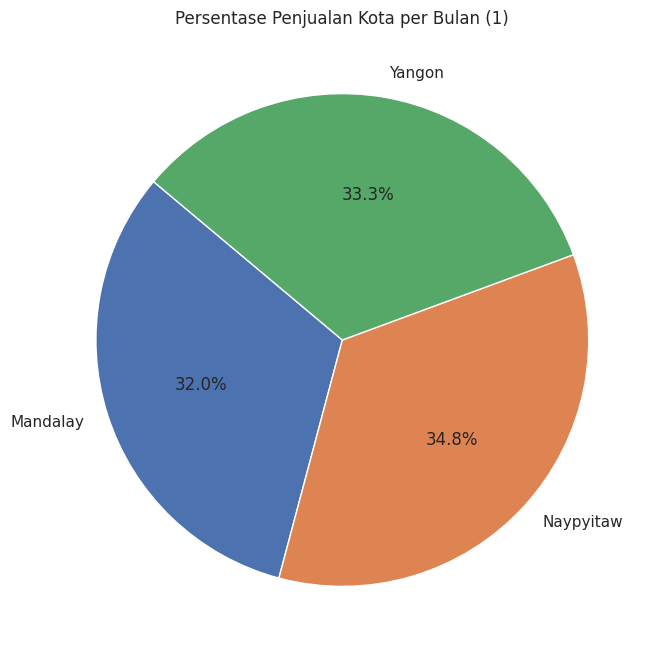

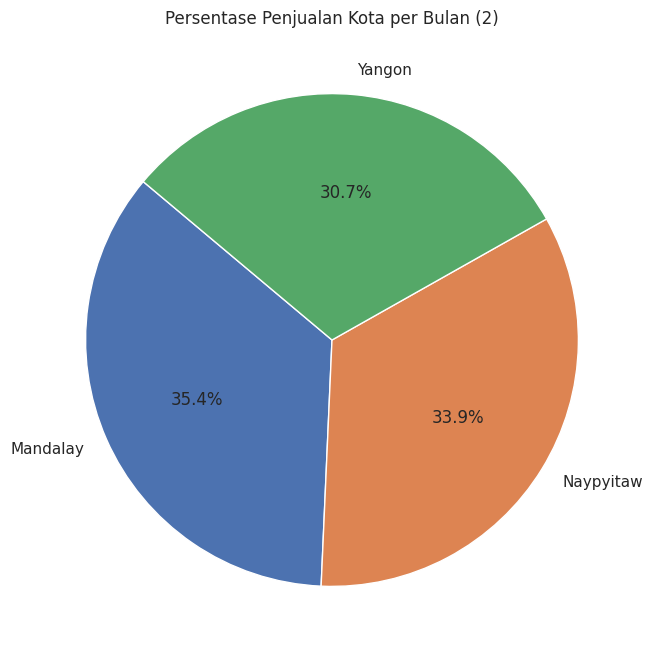

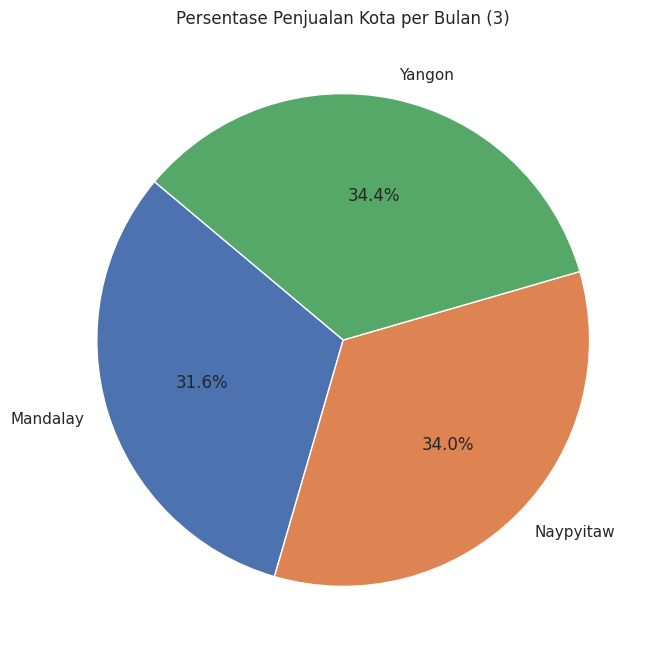

In [91]:
import matplotlib.pyplot as plt

# Menghitung total penjualan untuk setiap kota dalam setiap bulan
total_per_month_city = analisa_7.pivot(index='Month', columns='City', values='Total')

# Menghitung persentase penjualan untuk setiap kota dalam setiap bulan
percentage_per_month_city = total_per_month_city.div(total_per_month_city.sum(axis=1), axis=0) * 100

# Membuat pie chart untuk setiap bulan
months = percentage_per_month_city.index
for month in months:
    plt.figure(figsize=(8, 8))
    plt.pie(percentage_per_month_city.loc[month], labels=percentage_per_month_city.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Persentase Penjualan Kota per Bulan ({month})')
    plt.show()


In [92]:
# Membuat kolom baru Average per City
analisa_7['mean'] = sales.groupby('City')['Total'].transform('mean')
analisa_7

City  Month       Total        mean
0   Mandalay      1  37176.0585  312.354031
1   Mandalay      2  34424.2710  337.099715
2   Mandalay      3  34597.3425  312.354031
3  Naypyitaw      1  40434.6810  312.354031
4  Naypyitaw      2  32934.9825  312.354031
5  Naypyitaw      3  37199.0430  337.099715
6     Yangon      1  38681.1285  312.354031
7     Yangon      2  29860.1205  337.099715
8     Yangon      3  37659.1215  312.354031

In [93]:
# Give the status if higher from mean or lower or same
def status_sales(x):
  if x['Total'] < x['mean']:
    return "Lower"
  elif x['Total'] > x['mean']:
    return "Higher"
  else :
    return "Same"
analisa_7['status'] = analisa_7[['Total', 'mean']].apply(lambda x: status_sales(x), axis=1)
analisa_7

City  Month       Total        mean  status
0   Mandalay      1  37176.0585  312.354031  Higher
1   Mandalay      2  34424.2710  337.099715  Higher
2   Mandalay      3  34597.3425  312.354031  Higher
3  Naypyitaw      1  40434.6810  312.354031  Higher
4  Naypyitaw      2  32934.9825  312.354031  Higher
5  Naypyitaw      3  37199.0430  337.099715  Higher
6     Yangon      1  38681.1285  312.354031  Higher
7     Yangon      2  29860.1205  337.099715  Higher
8     Yangon      3  37659.1215  312.354031  Higher

### **Exercise**

#### Kunci Jawaban 1: Pada hari dan jam berapa akan terjadi lonjakan pembelian suatu produk berdasarkan kotanya?

In [94]:
hari_jam = pd.DataFrame(sales.groupby(['City', 'Product line', 'Hour'])['Quantity'].mean())
hari_jam

Quantity
City     Product line           Hour          
Mandalay Electronic accessories 10    6.000000
                                11    7.400000
                                12    6.500000
                                13    5.250000
                                14    6.000000
...                                        ...
Yangon   Sports and travel      16    3.750000
                                17    4.000000
                                18    2.600000
                                19    8.400000
                                20    5.333333

[196 rows x 1 columns]

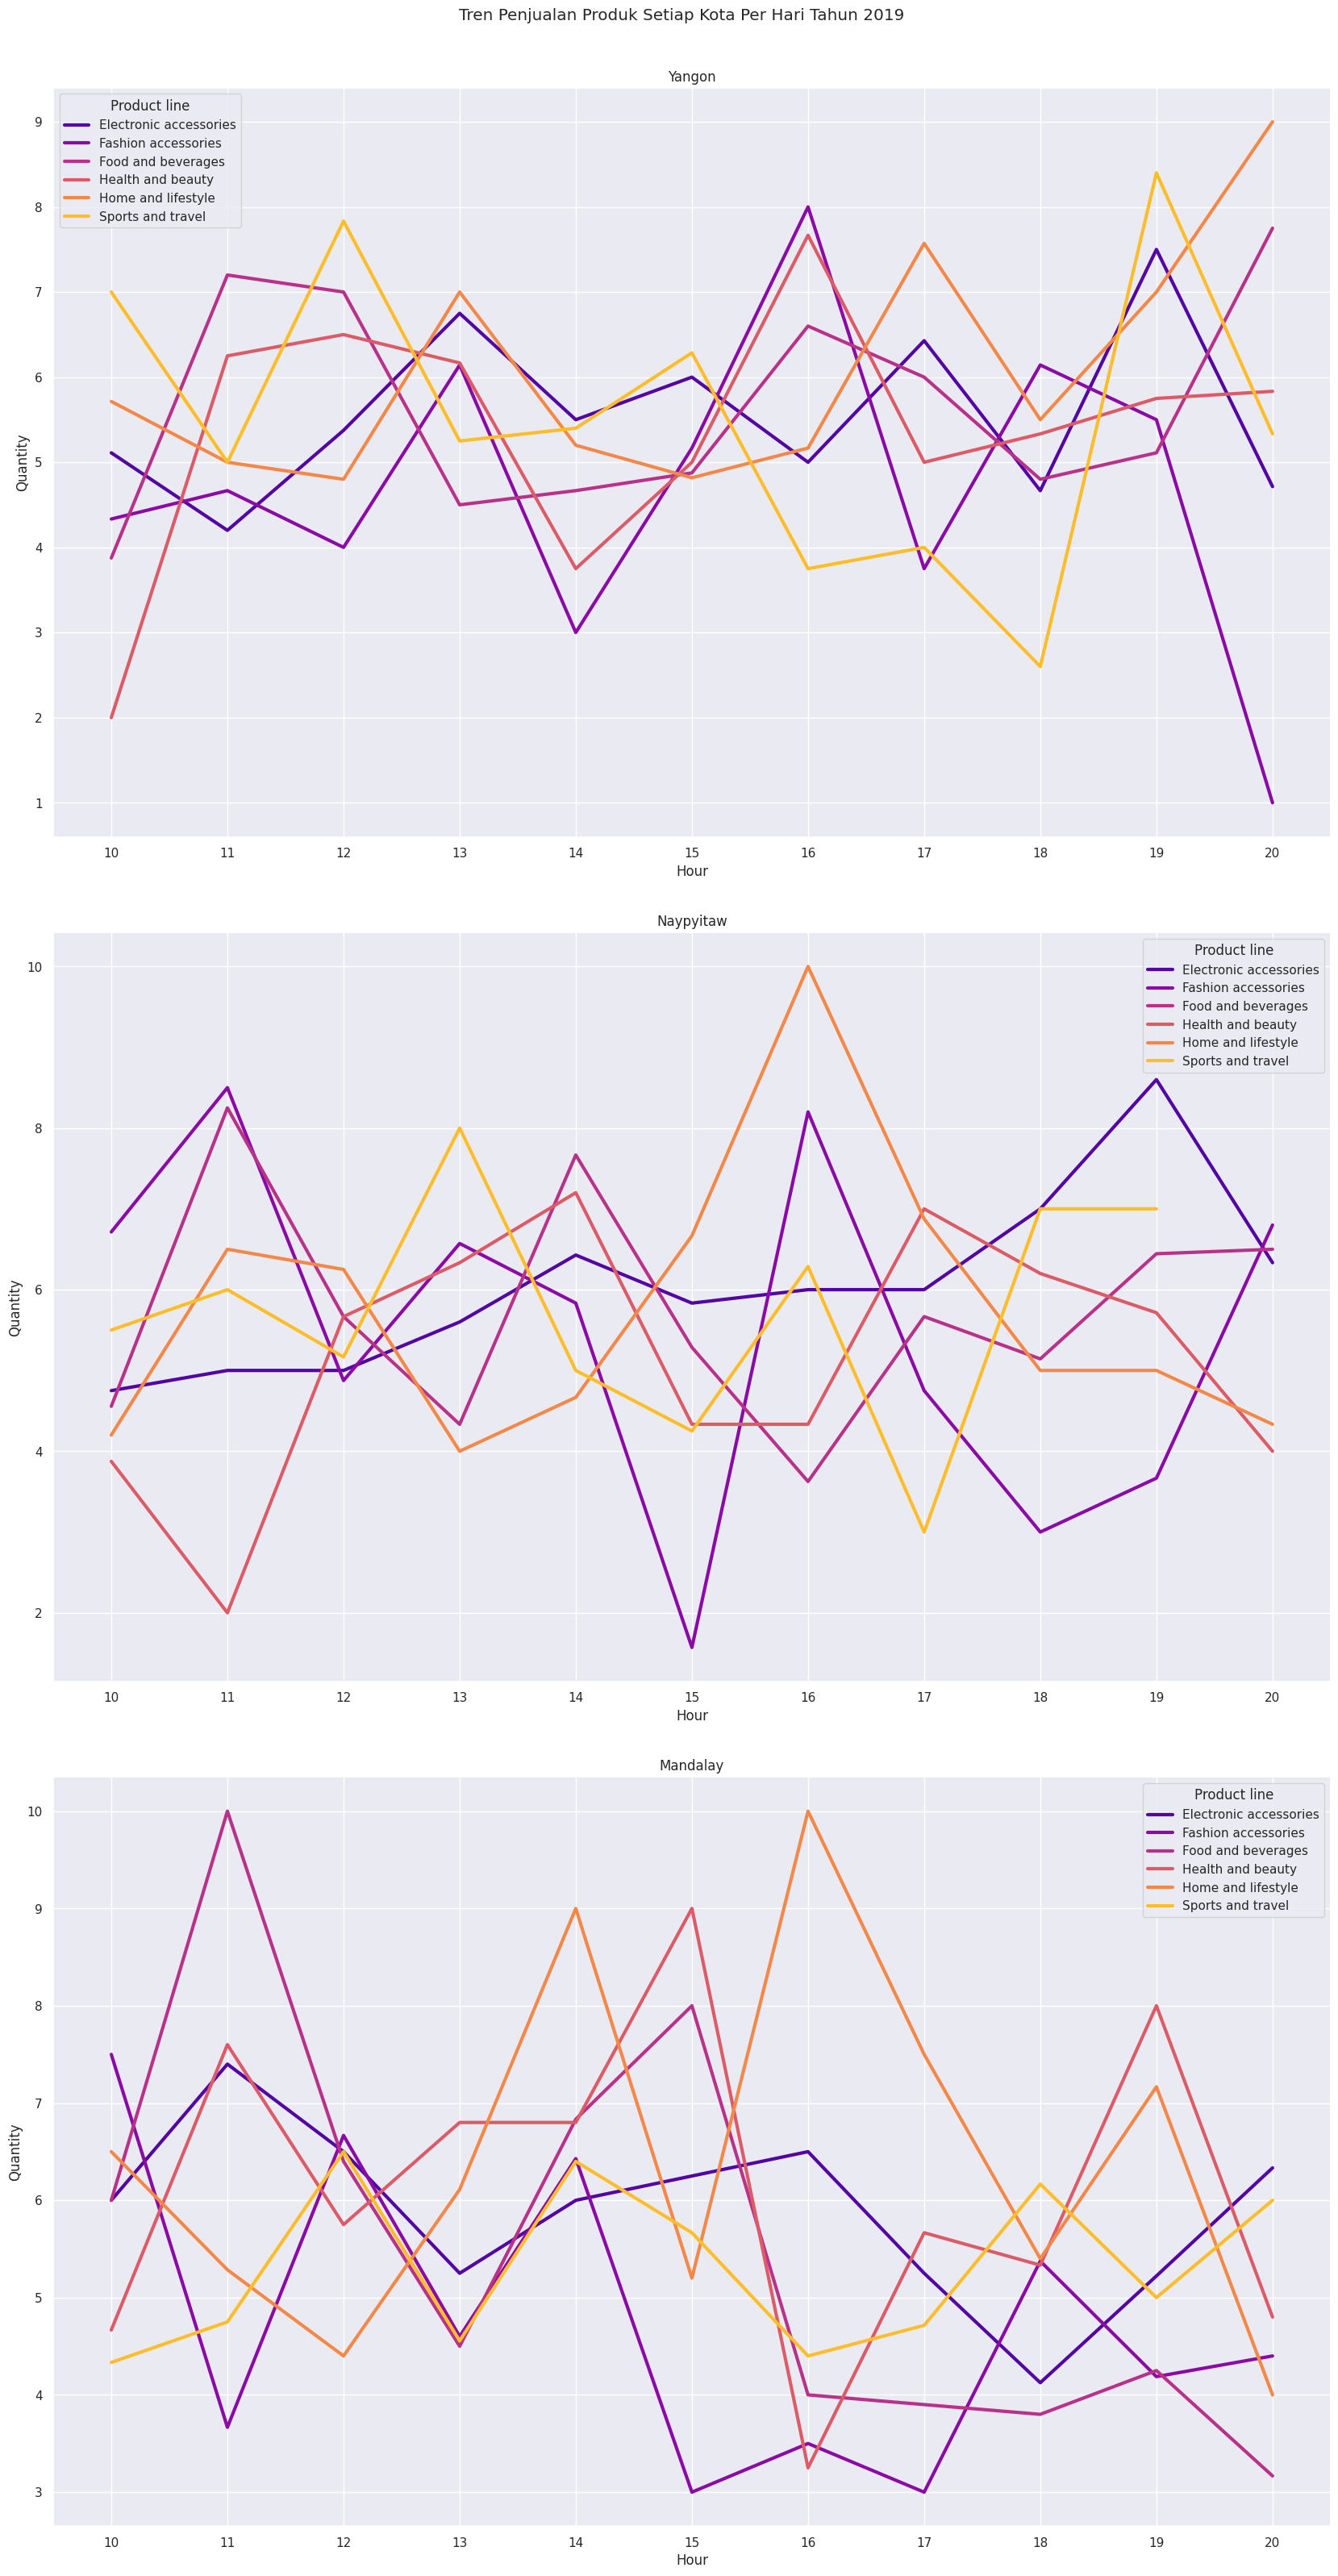

In [95]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,33)})

fig, axes = plt.subplots(3, 1, sharex=False, sharey=False)
fig.suptitle('Tren Penjualan Produk Setiap Kota Per Hari Tahun 2019')
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.95)

city = [k for k in sales.City.unique()]
for i, kota in enumerate(city):
  sns.lineplot(data=hari_jam.xs(kota, level='City'), x ='Hour', y = 'Quantity',
                    hue='Product line', palette='plasma',
                    legend='full', lw=3, ax=axes[i])
  axes[i].set_title(str(kota))
  #axes[i].set_ylim(2000,11000)
  axes[i].xaxis.set_major_locator(ticker.MultipleLocator(1))


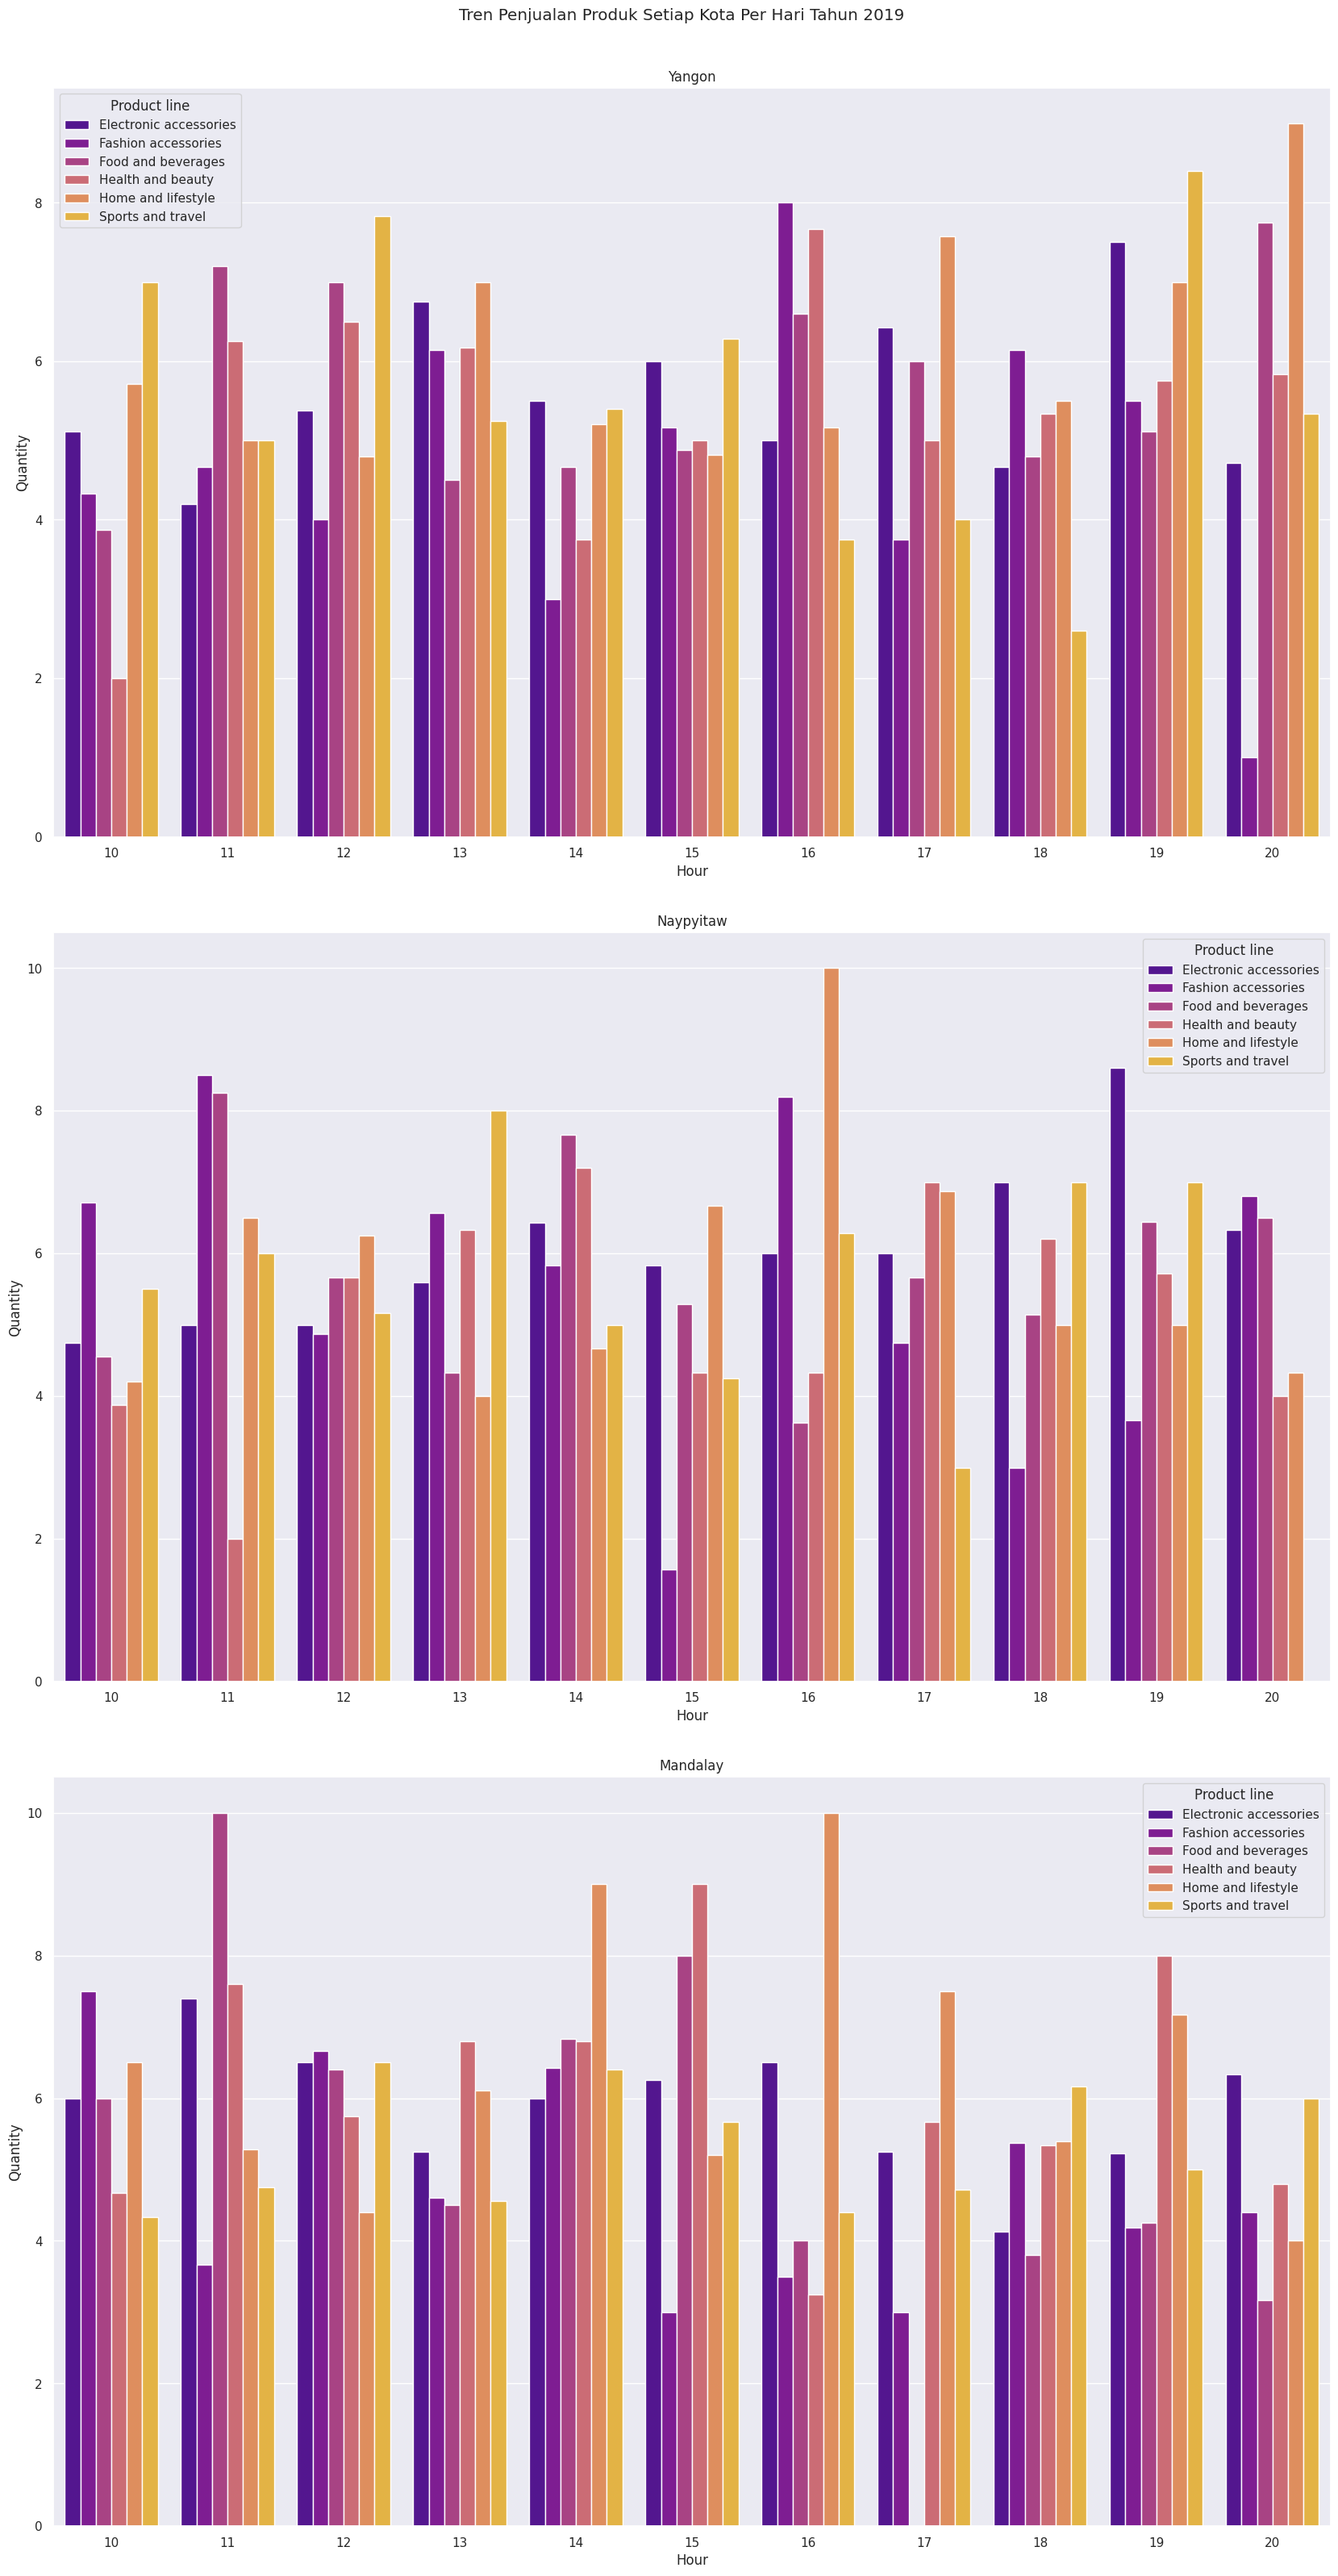

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Mengatur gaya dan ukuran gambar
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(18,33)})

# Membuat subplot
fig, axes = plt.subplots(3, 1, sharex=False, sharey=False)
fig.suptitle('Tren Penjualan Produk Setiap Kota Per Hari Tahun 2019')
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.95)

# Mendapatkan daftar kota
city = sales['City'].unique()

# Looping untuk setiap kota
for i, kota in enumerate(city):
    # Membuat bar plot
    sns.barplot(data=hari_jam.xs(kota, level='City'), x='Hour', y='Quantity',
                hue='Product line', palette='plasma',
                ax=axes[i])

    # Menyesuaikan judul subplot
    axes[i].set_title(str(kota))

    # Menentukan lokasi major ticks pada sumbu x
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()


#### Kunci Jawaban 2: Jenis produk apa yang sering dibeli (dihitung dari jumlah customer) berdasar jenis kelamin dan jenis customernya?  

In [97]:
pd.crosstab(index = [sales['Product line'], sales.Gender] , columns=sales['Customer type'], margins=True)

Customer type                  Member  Normal   All
Product line           Gender                      
Electronic accessories Female      35      49    84
                       Male        43      43    86
Fashion accessories    Female      47      49    96
                       Male        39      43    82
Food and beverages     Female      51      39    90
                       Male        43      41    84
Health and beauty      Female      30      34    64
                       Male        43      45    88
Home and lifestyle     Female      47      32    79
                       Male        36      45    81
Sports and travel      Female      51      37    88
                       Male        36      42    78
All                               501     499  1000